**MIT License**

Copyright (c) 2024 MukulSaiPendem

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# Assignment 1


## AIM: 
To check the quality of the data and determine which features are important. and then do a predictive analysis 

In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier

In [3]:
#importing the dataset to this notebook
file_path = './val_stats.csv'
data = pd.read_csv(file_path, low_memory=False)

In [4]:
num_duplicates = data.duplicated().sum()
data.drop_duplicates(inplace=True)
num_duplicates

1084

In [5]:
data = data.drop_duplicates()

## DATASET DESCRIPTION
This dataset contains data related to player performance in a competitive video game Valorant. This is a first person shooter video game. 

In [6]:
data.columns

Index(['region', 'name', 'tag', 'rating', 'damage_round', 'headshots',
       'headshot_percent', 'aces', 'clutches', 'flawless', 'first_bloods',
       'kills', 'deaths', 'assists', 'kd_ratio', 'kills_round', 'most_kills',
       'score_round', 'wins', 'win_percent', 'agent_1', 'agent_2', 'agent_3',
       'gun1_name', 'gun1_head', 'gun1_body', 'gun1_legs', 'gun1_kills',
       'gun2_name', 'gun2_head', 'gun2_body', 'gun2_legs', 'gun2_kills',
       'gun3_name', 'gun3_head', 'gun3_body', 'gun3_legs', 'gun3_kills'],
      dtype='object')

## Variable Descriptions

**Region**: 
<span style="color:green;">Indicates the geographical location or server region of the player. Different regions can represent different player communities and competitive environments.</span>

**Name**: 
<span style="color:green;">The in-game username chosen by the player. It's a unique identifier for each player within the game.</span>

**Tag**: 
<span style="color:green;">An additional identifier or code associated with the player's account, often used in conjunction with the name for unique identification.</span>

**Rating**: 
<span style="color:green;">A numerical value representing the player's skill level or rank. Higher ratings usually indicate more skilled or experienced players.</span>

**Damage per Round**: 
<span style="color:green;">Shows the average amount of damage the player inflicts on opponents in each round. This is a measure of the player's effectiveness in harming opponents, with higher values indicating greater impact in the game.</span>

**Headshots**: 
<span style="color:green;">The total number of times a player has successfully hit opponents in the head. Headshots are typically more difficult to achieve but are more effective in the game.</span>

**Headshot Percent**: 
<span style="color:green;">The percentage of the player's shots that result in headshots. A higher percentage is indicative of better precision and aiming skill.</span>

**Kills**: 
<span style="color:green;">The total number of opponents a player has eliminated. This is a direct measure of offensive performance.</span>

**Deaths**: 
<span style="color:green;">The number of times a player has been eliminated by an opponent. This figure is used to assess a player's survivability and defensive skills.</span>

**Assists**: 
<span style="color:green;">The count of assists represents the number of times a player has helped a teammate kill an opponent. Assists can indicate a player's teamwork and support capabilities.</span>

**K/D Ratio**: 
<span style="color:green;">The kill/death ratio is calculated by dividing the number of kills by the number of deaths. A higher ratio suggests that a player eliminates more opponents than they are eliminated.</span>

**Kills per Round**: 
<span style="color:green;">The average number of kills a player achieves each round, which shows their consistent contribution to the team's offensive efforts.</span>

**Most Kills**: 
<span style="color:green;">The highest number of kills a player has achieved in a single game. This can highlight a player's peak performance capability.</span>

**Score per Round**: 
<span style="color:green;">The average score a player achieves per round, factoring in various aspects of their performance, not just eliminations.</span>

**Wins**: 
<span style="color:green;">The number of games a player or their team has won. Wins are the ultimate objective and indicate the effectiveness of a player's contribution to the team's success.</span>

**Win Percent**: 
<span style="color:green;">The percentage of games won out of all games played. This metric is used to gauge overall team success and, indirectly, the player's impact on games.</span>

**Aces**: 
<span style="color:green;">Counts the number of times a player has single-handedly eliminated all opposing team members in a round. This is a rare and notable achievement, showcasing exceptional individual skill.</span>

**Clutches**: 
<span style="color:green;">The number of rounds a player wins single-handedly while being the last surviving member of their team against multiple opponents. This metric highlights the player's ability to perform under high-pressure situations.</span>

**Flawless**: 
<span style="color:green;">Refers to rounds where the player's team wins without losing any team members. It indicates a round dominated by the player's team.</span>

**Gun Statistics**: 
<span style="color:green;">These include detailed performance metrics for different guns used by players. Each gun has associated statistics like gun name, head, body, legs, and kills, providing insights into weapon proficiency and playstyle.</span>
<span style="color:black;">all theses columns come under this 'gun1_name', 'gun1_head', 'gun1_body', 'gun1_legs', 'gun1_kills', 'gun2_name', 'gun2_head', 'gun2_body', 'gun2_legs', 'gun2_kills', 'gun3_name', 'gun3_head', 'gun3_body', 'gun3_legs', 'gun3_kills'</span>


 ## What are the data types? 

In [7]:
data.dtypes

region               object
name                 object
tag                  object
rating               object
damage_round        float64
headshots            object
headshot_percent    float64
aces                  int64
clutches              int64
flawless              int64
first_bloods         object
kills                object
deaths               object
assists              object
kd_ratio            float64
kills_round         float64
most_kills            int64
score_round         float64
wins                  int64
win_percent         float64
agent_1              object
agent_2              object
agent_3              object
gun1_name            object
gun1_head             int64
gun1_body             int64
gun1_legs             int64
gun1_kills           object
gun2_name            object
gun2_head             int64
gun2_body             int64
gun2_legs             int64
gun2_kills           object
gun3_name            object
gun3_head             int64
gun3_body           

Some features are wrongly classified as object dtype due to the issue with commas (,) typically arises from the way numbers are formatted in certain locales. In many places, commas are used as thousand separators to improve readability of large numbers. For example, the number one thousand is often written as 1,000.

these columns have this issue
'gun1_kills', 'gun2_kills', 'first_bloods', 'headshots', 'deaths', 'kills', 'assists'

**How to correct this?**
we need to replace the (,) with ''. this is resolve the wrong interpretation.

In [8]:
# Function to safely convert columns to integers
def convert_column_to_int(df, column_name):
    if df[column_name].dtype == 'object':
        df[column_name] = pd.to_numeric(df[column_name].str.replace(',', ''), errors='coerce')
    return df

In [9]:
# Columns that we expect to be numeric but may contain commas
columns_with_potential_commas = ['gun1_kills', 'gun2_kills', 'first_bloods', 'headshots', 'deaths', 'kills', 'assists']

# Apply the conversion to each column
for col in columns_with_potential_commas:
    data = convert_column_to_int(data, col)

# Now check the dtypes to confirm the conversion
data.dtypes

region               object
name                 object
tag                  object
rating               object
damage_round        float64
headshots             int64
headshot_percent    float64
aces                  int64
clutches              int64
flawless              int64
first_bloods          int64
kills                 int64
deaths                int64
assists               int64
kd_ratio            float64
kills_round         float64
most_kills            int64
score_round         float64
wins                  int64
win_percent         float64
agent_1              object
agent_2              object
agent_3              object
gun1_name            object
gun1_head             int64
gun1_body             int64
gun1_legs             int64
gun1_kills            int64
gun2_name            object
gun2_head             int64
gun2_body             int64
gun2_legs             int64
gun2_kills            int64
gun3_name            object
gun3_head             int64
gun3_body           

## Numeric Data Types:

- **Float64**: `damage_round`, `headshot_percent`, `kd_ratio`, `kills_round`, `score_round`, `win_percent`. 
  - These are floating-point numbers and can represent quantities with decimal precision.

- **Int64**: `headshots`, `first_bloods`, `kills`, `deaths`, `assists`, `aces`, `clutches`, `flawless`, `most_kills`, `wins`, `gun1_head`, `gun1_body`, `gun1_legs`, `gun2_head`, `gun2_body`, `gun2_legs`, `gun3_head`, `gun3_body`, `gun3_legs`, `gun3_kills` , `gun1_kills`, `gun2_kills`. 
  - These are integer numbers and represent whole quantities without decimals.

## Categorical Data Types:

- **Object**: `region`, `name`, `tag`, `rating`, `assists`, `agent_1`, `agent_2`, `agent_3`, `gun1_name`, `gun2_name`, `gun3_name`. 
  - These are typically non-numeric data and are treated as categorical.

As the data Size is huge, to reduce high computation time we are going to do **Sampling** on the Dataset

In [10]:
sampled_dataset = data.sample(frac=0.2, random_state=1)

## Are there missing values?

Yes, there are some missing values in the dataset.

In [11]:
sampled_dataset.isnull().sum()

region              4225
name                   0
tag                   48
rating                 0
damage_round           0
headshots              0
headshot_percent       0
aces                   0
clutches               0
flawless               0
first_bloods           0
kills                  0
deaths                 0
assists                0
kd_ratio               0
kills_round            0
most_kills             0
score_round            0
wins                   0
win_percent            0
agent_1                0
agent_2              375
agent_3             1005
gun1_name              0
gun1_head              0
gun1_body              0
gun1_legs              0
gun1_kills             0
gun2_name              0
gun2_head              0
gun2_body              0
gun2_legs              0
gun2_kills             0
gun3_name              0
gun3_head              0
gun3_body              0
gun3_legs              0
gun3_kills             0
dtype: int64

##  Which independent variables have missing data? How much? 

### Missing Values in the Dataset

- `region`: 4225 missing values
- `name`: 0 missing values
- `tag`: 48 missing values
- `agent_2`: 375 missing values
- `agent_3`: 1005 missing values

All other columns do not have missing values. Handling these missing values is a crucial step in the data preprocessing phase prior to any detailed analysis or predictive modeling.
We only have missing values in 5 featues( catagorical ), all numerical feature are complete without any missing values

## How can we remove the missing values?

As our missing values are only from catagorical data, lets use **Mode Imputation**

### Mode Imputation

The method of replacing missing values in each categorical column with the most frequent value (mode) in that column is commonly referred to as "Mode Imputation" or "Imputation by the Most Frequent Value."

In [12]:
# Identifying categorical columns
categorical_columns = sampled_dataset.select_dtypes(include=['object', 'category']).columns

# Applying mode imputation
for col in categorical_columns:
    most_frequent_value = sampled_dataset[col].mode()[0]
    sampled_dataset[col].fillna(most_frequent_value, inplace=True)

# Checking for remaining null values
print("Remaining null values after mode imputation:\n", sampled_dataset.isnull().sum())

Remaining null values after mode imputation:
 region              0
name                0
tag                 0
rating              0
damage_round        0
headshots           0
headshot_percent    0
aces                0
clutches            0
flawless            0
first_bloods        0
kills               0
deaths              0
assists             0
kd_ratio            0
kills_round         0
most_kills          0
score_round         0
wins                0
win_percent         0
agent_1             0
agent_2             0
agent_3             0
gun1_name           0
gun1_head           0
gun1_body           0
gun1_legs           0
gun1_kills          0
gun2_name           0
gun2_head           0
gun2_body           0
gun2_legs           0
gun2_kills          0
gun3_name           0
gun3_head           0
gun3_body           0
gun3_legs           0
gun3_kills          0
dtype: int64


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = sampled_dataset.select_dtypes(include=['int64', 'float64', 'int32' ])

def histogram_ploter(column):
    plt.figure(figsize=(10, 6))
    sns.histplot(numeric_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    return
    

In [14]:
numeric_data.columns

Index(['damage_round', 'headshots', 'headshot_percent', 'aces', 'clutches',
       'flawless', 'first_bloods', 'kills', 'deaths', 'assists', 'kd_ratio',
       'kills_round', 'most_kills', 'score_round', 'wins', 'win_percent',
       'gun1_head', 'gun1_body', 'gun1_legs', 'gun1_kills', 'gun2_head',
       'gun2_body', 'gun2_legs', 'gun2_kills', 'gun3_head', 'gun3_body',
       'gun3_legs', 'gun3_kills'],
      dtype='object')

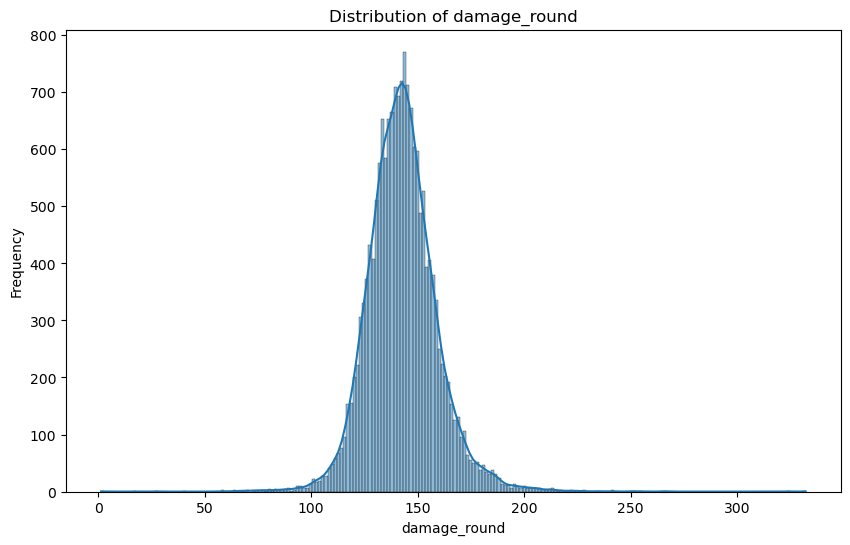

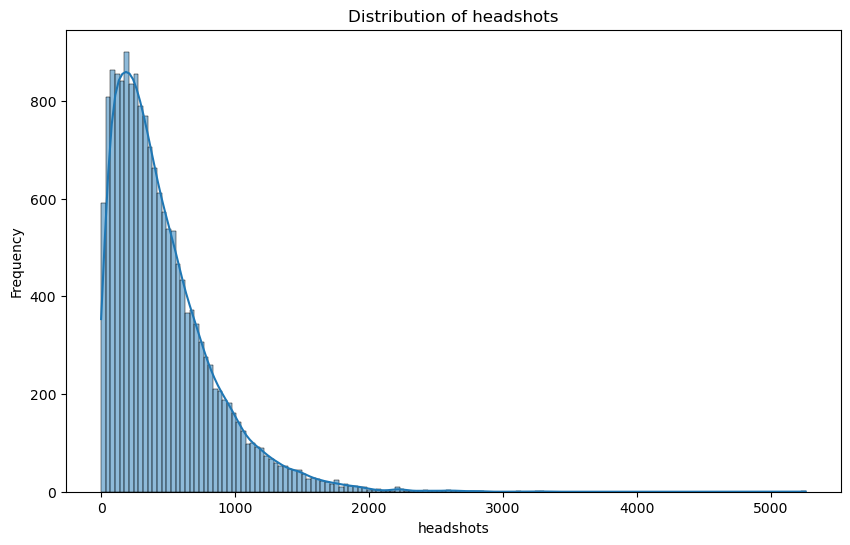

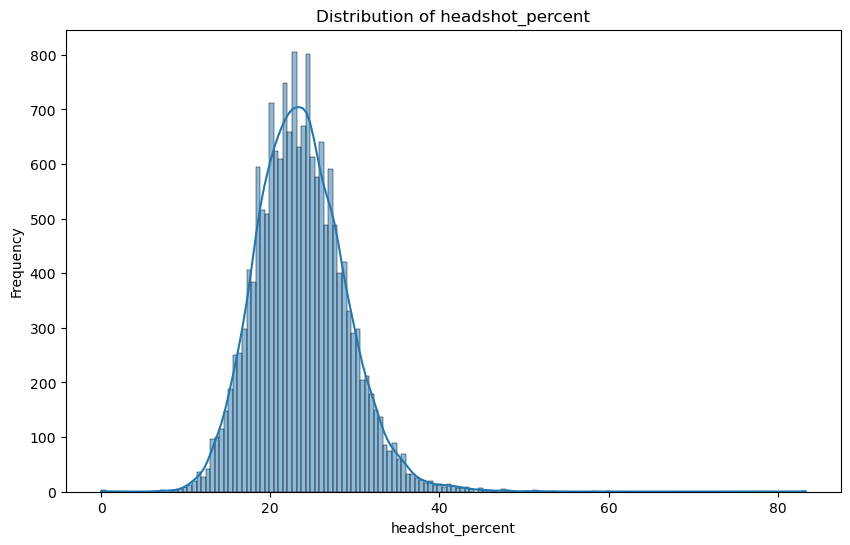

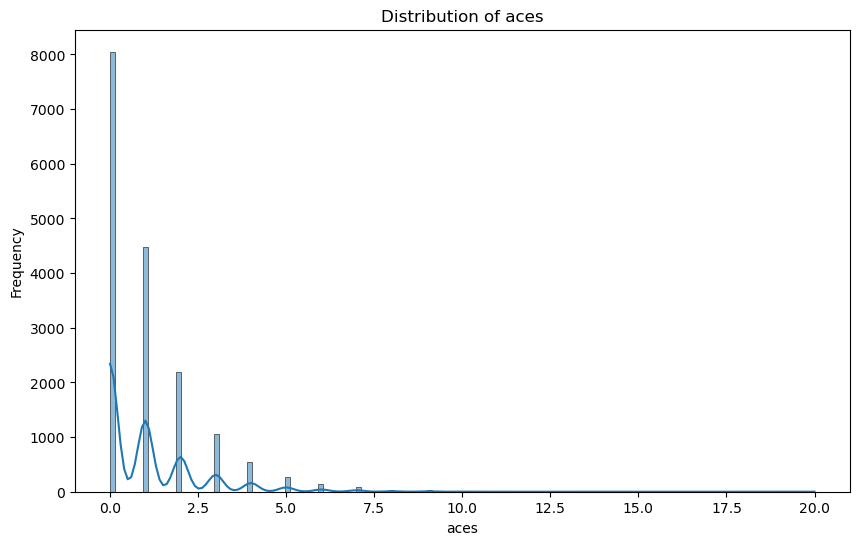

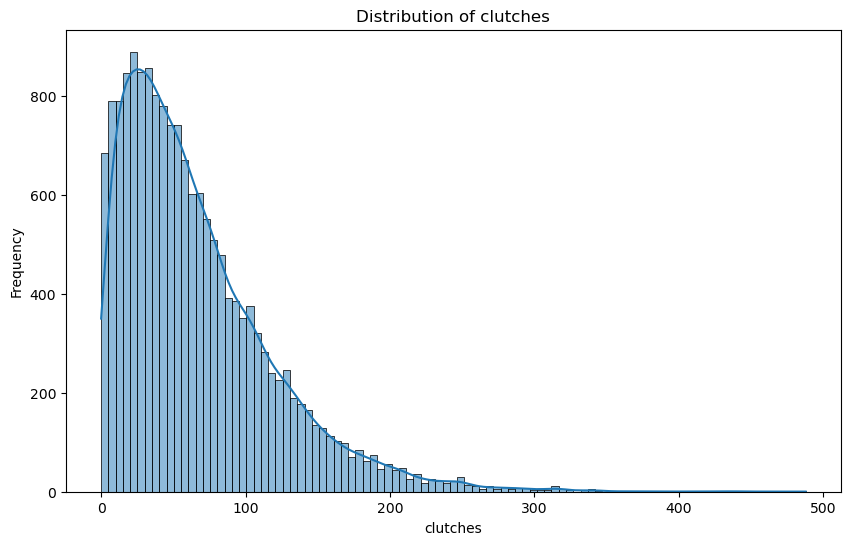

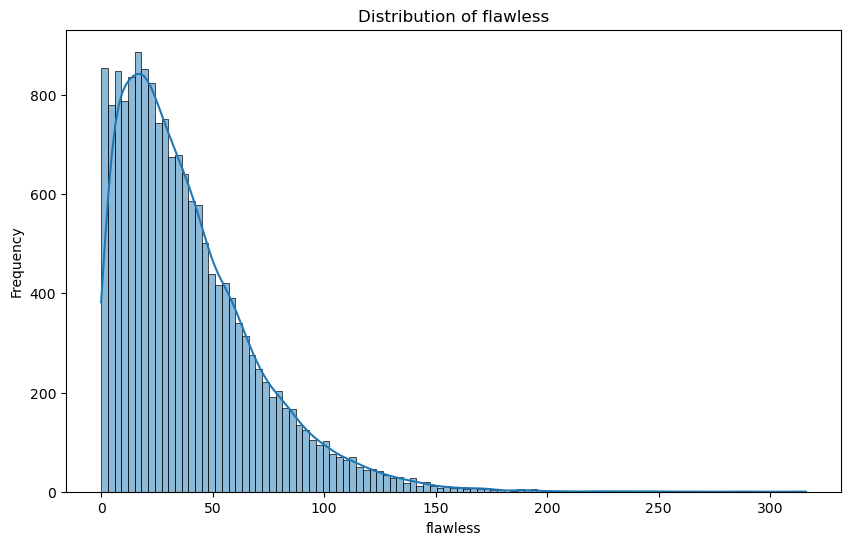

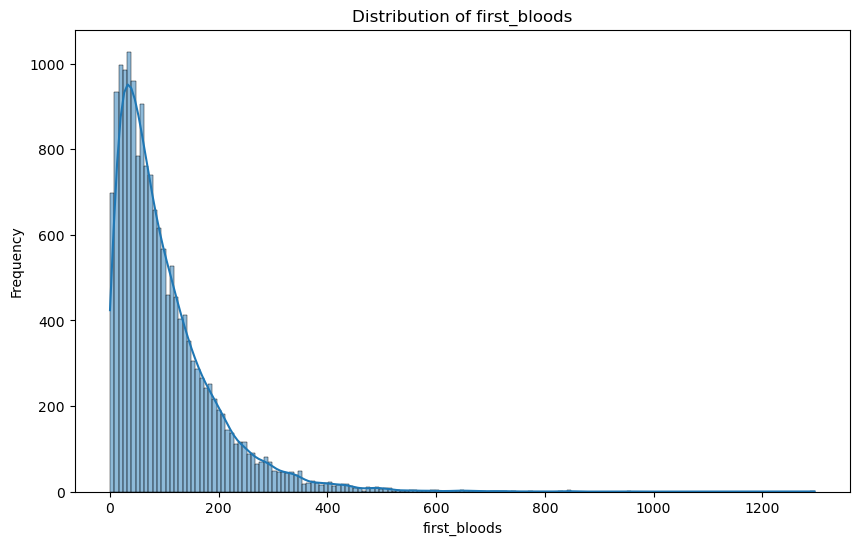

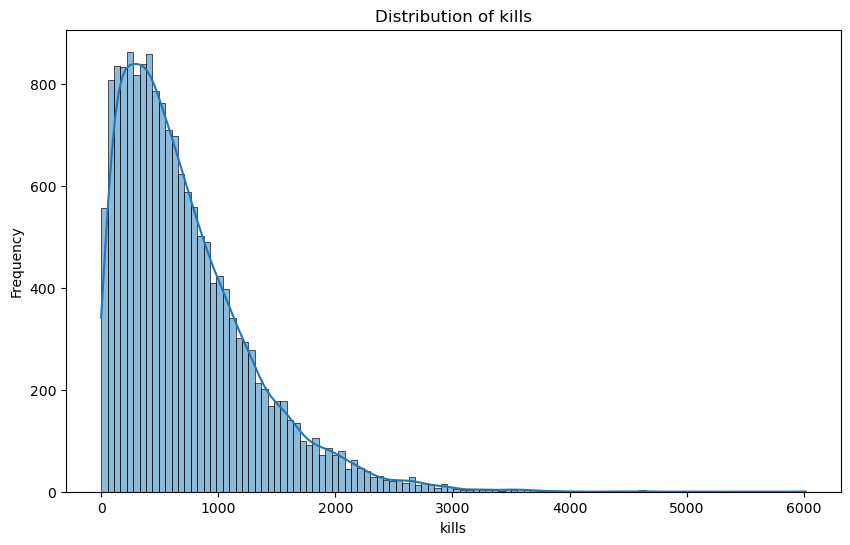

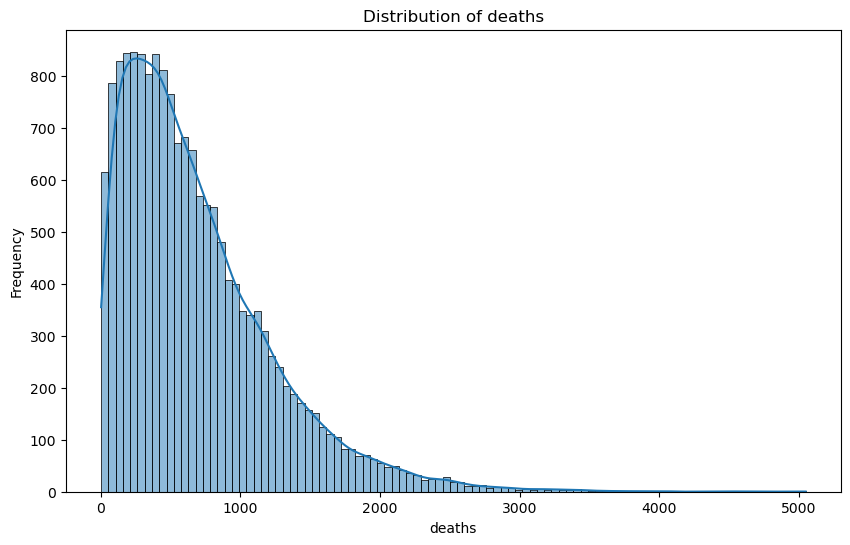

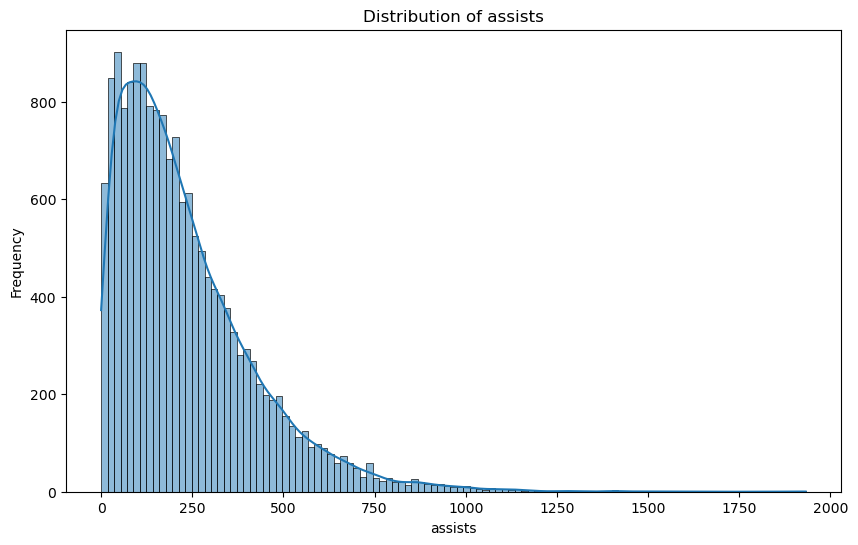

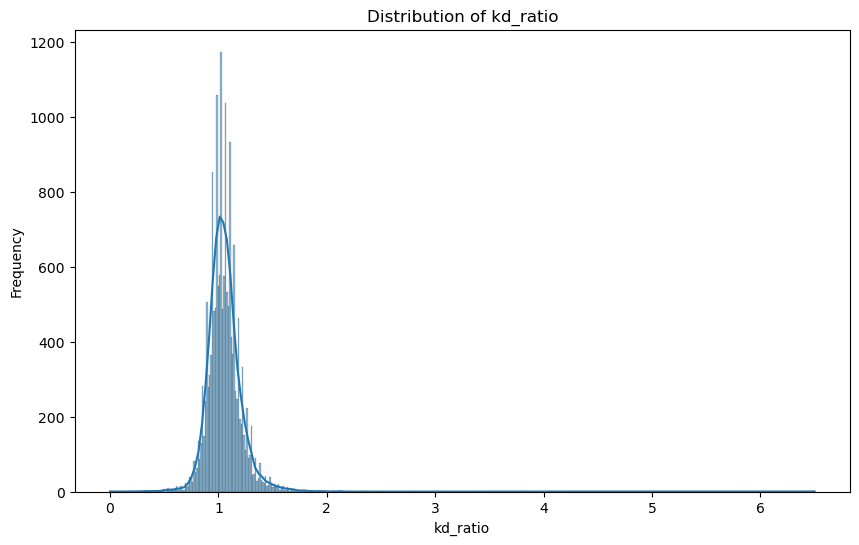

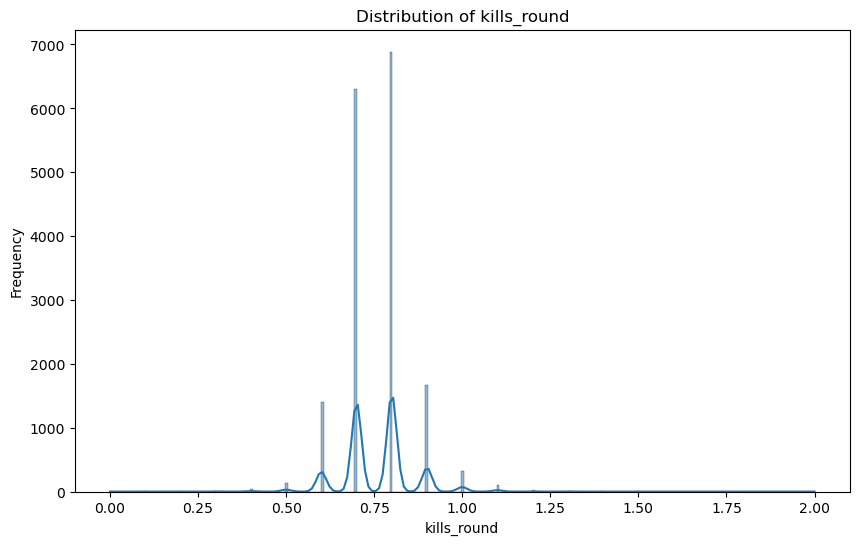

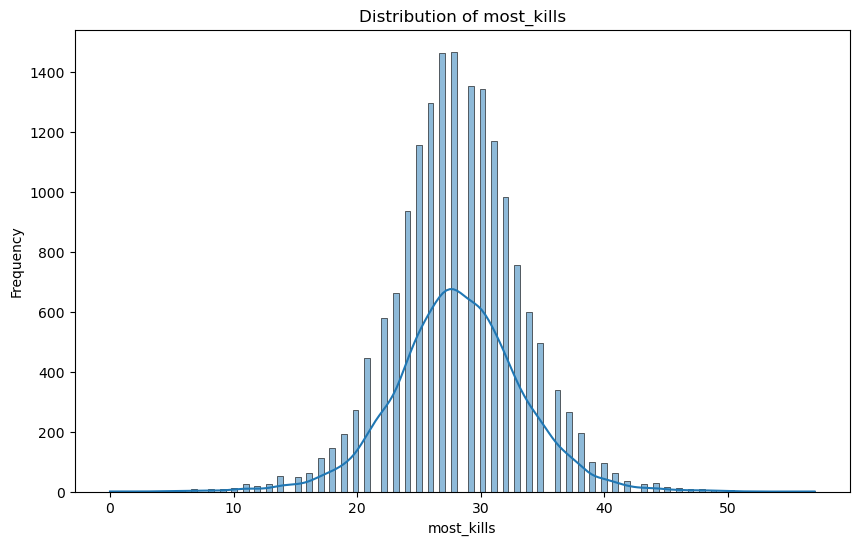

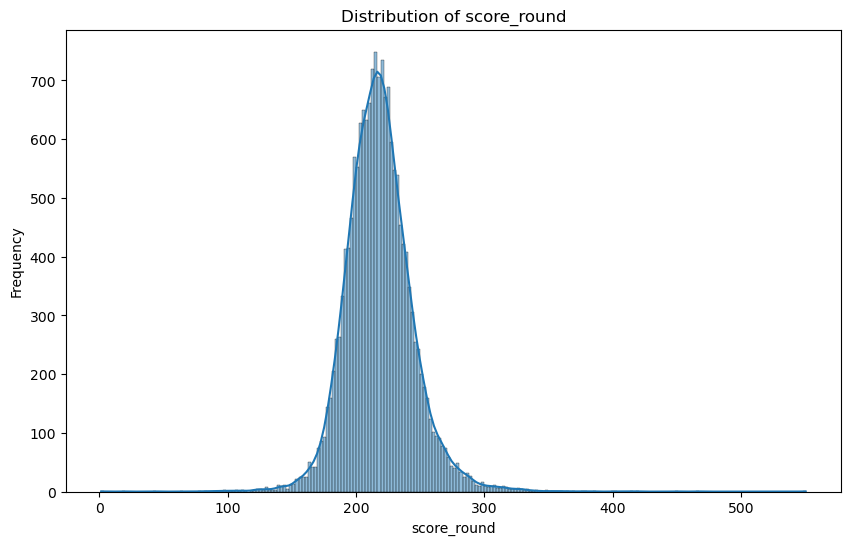

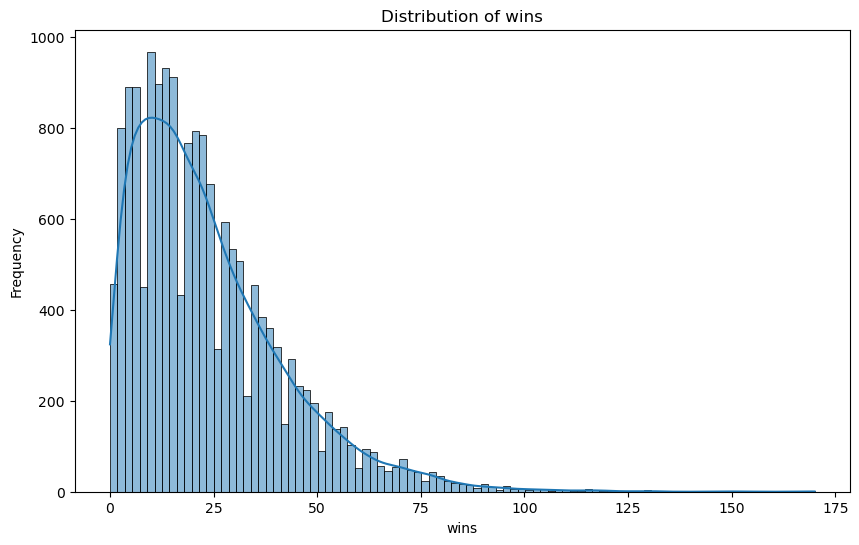

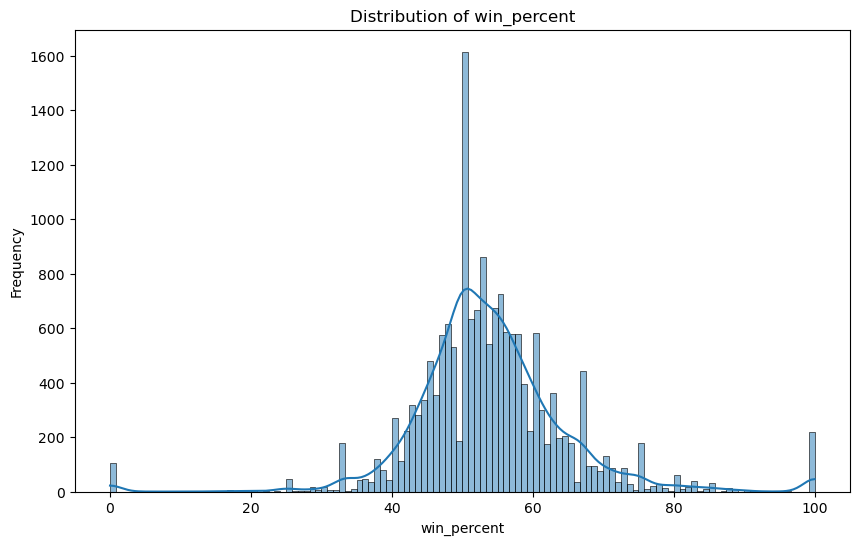

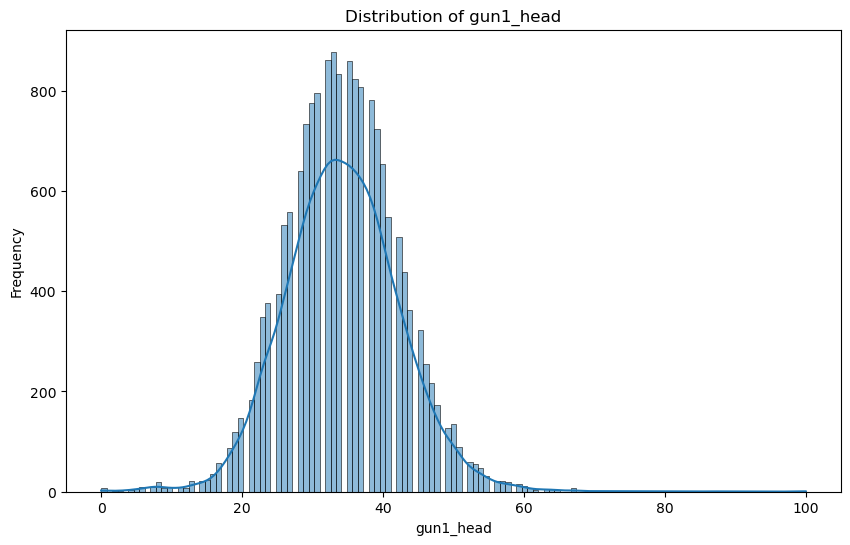

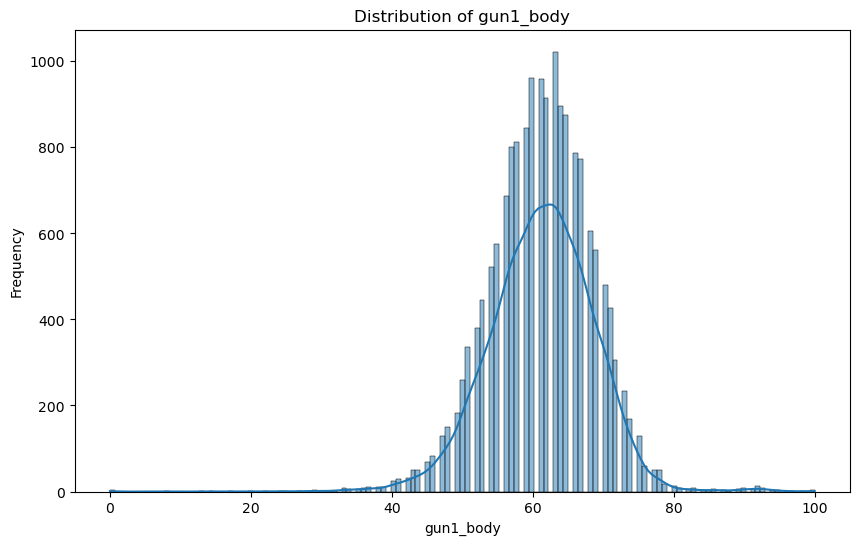

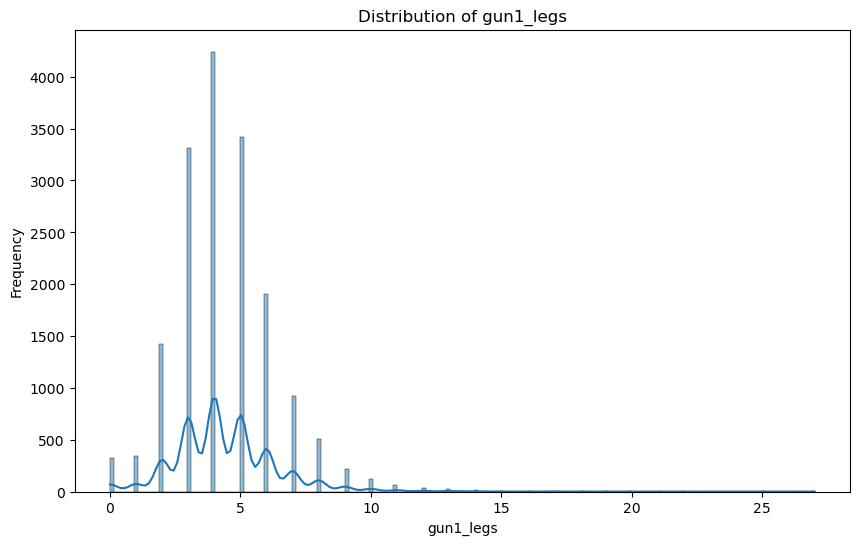

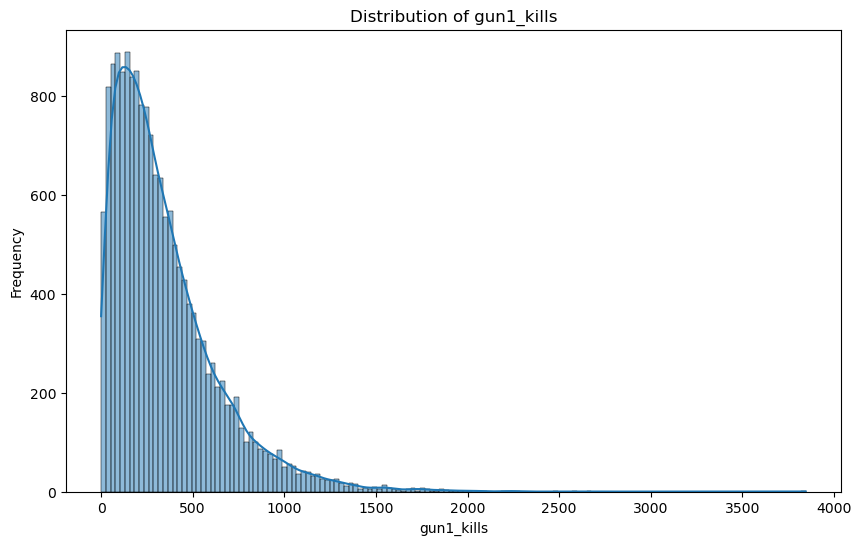

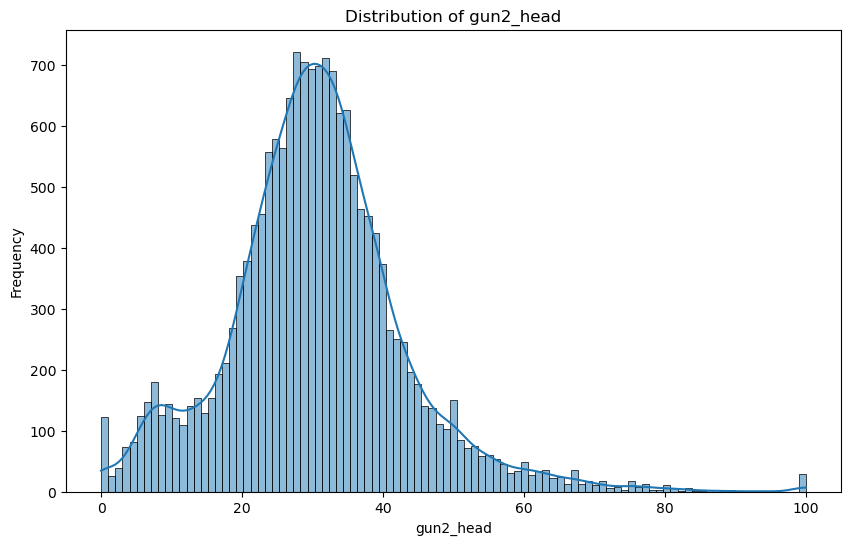

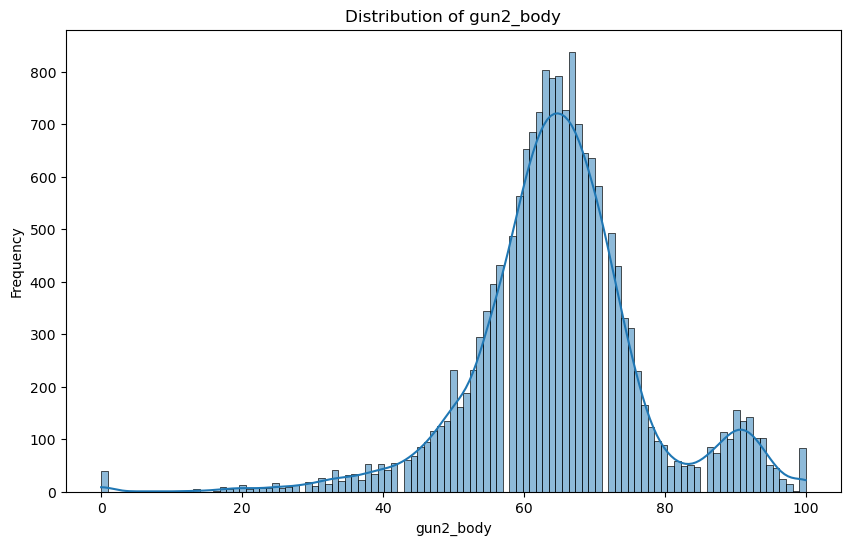

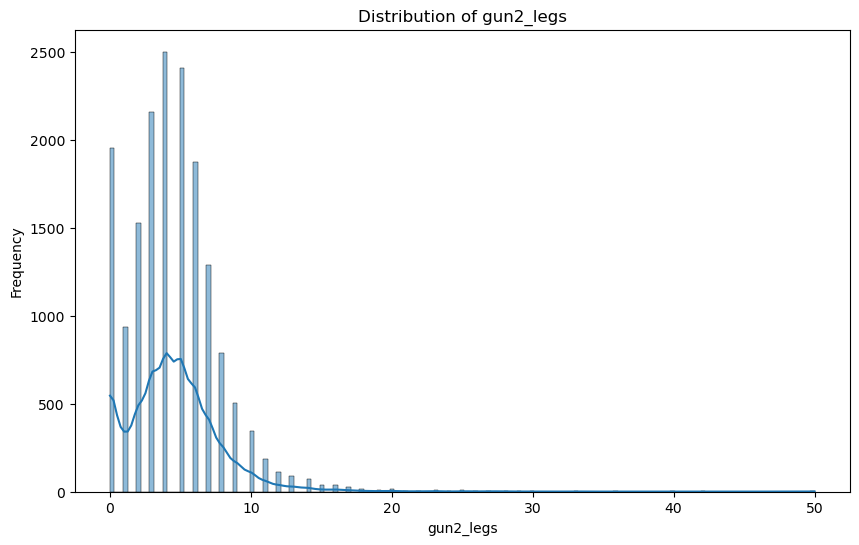

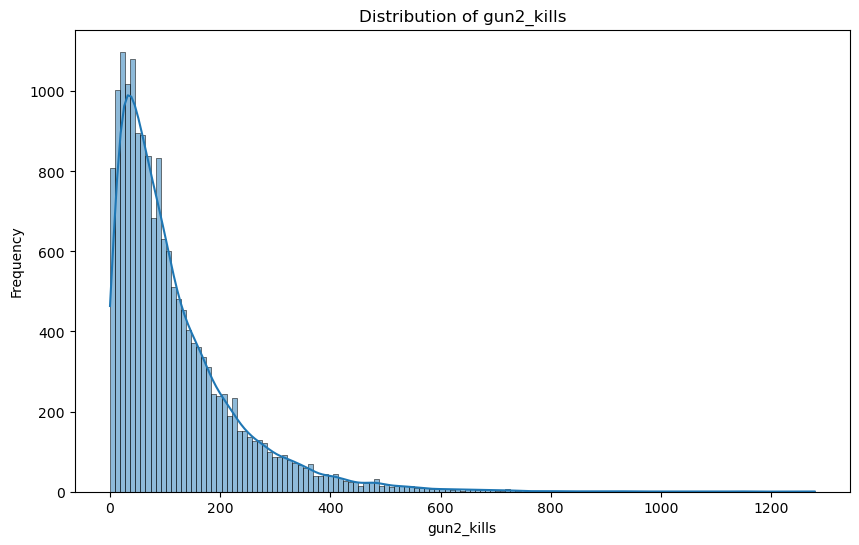

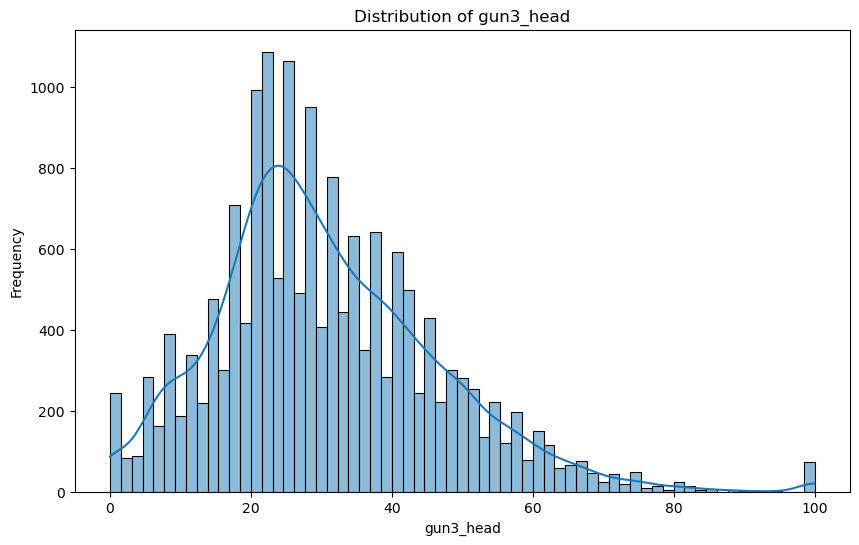

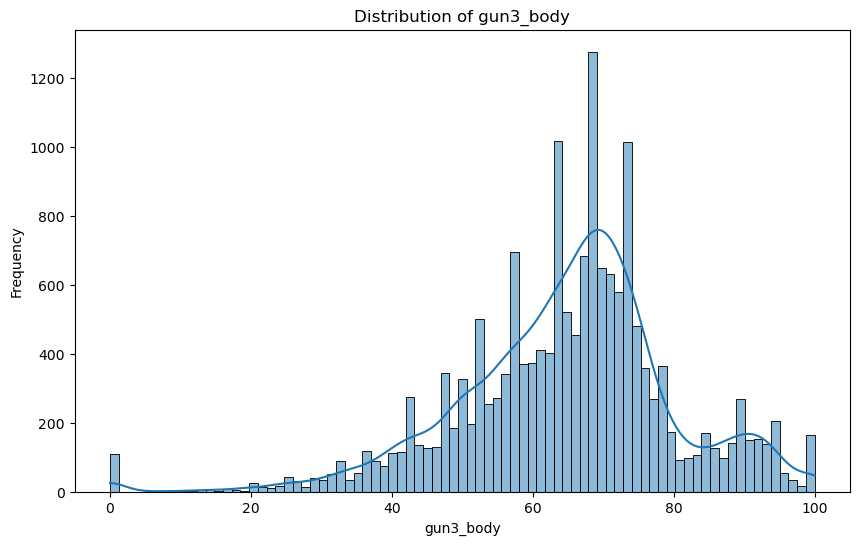

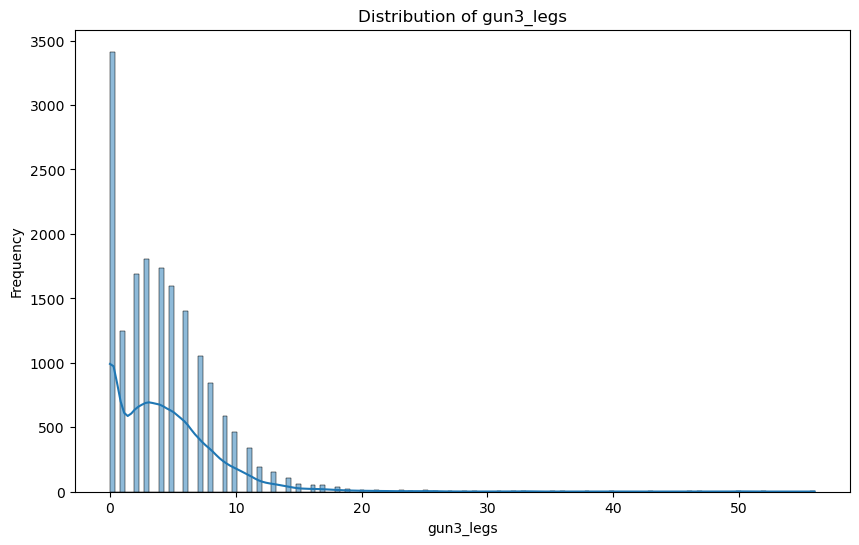

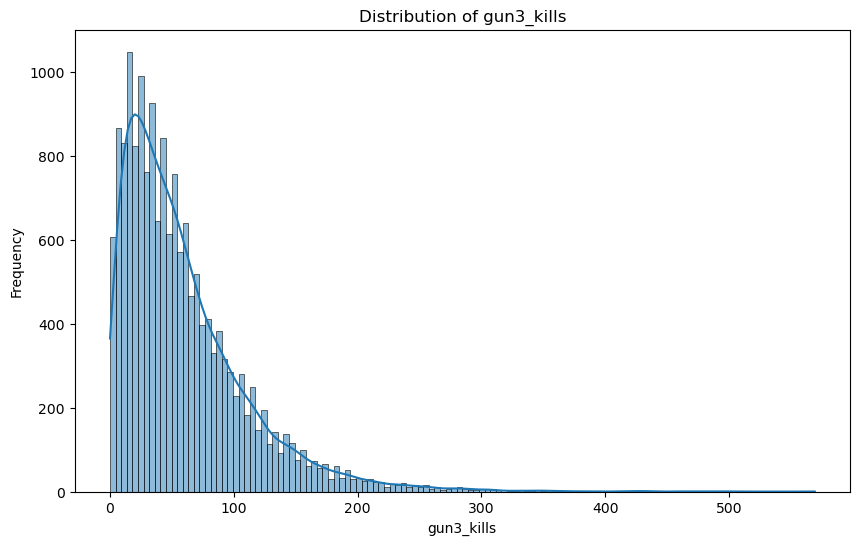

In [15]:
for c in numeric_data:
    histogram_ploter(c)

## Lets look at each numeric feature one by one

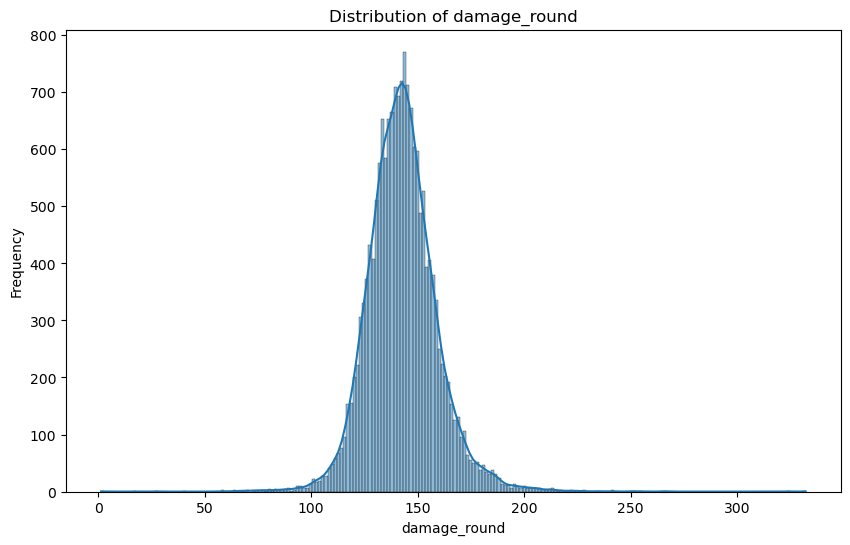

In [16]:
histogram_ploter('damage_round')

**Damage per Round**

The distribution of this feature appers to be bell shaped, which indicates that it is *Normal distribution*

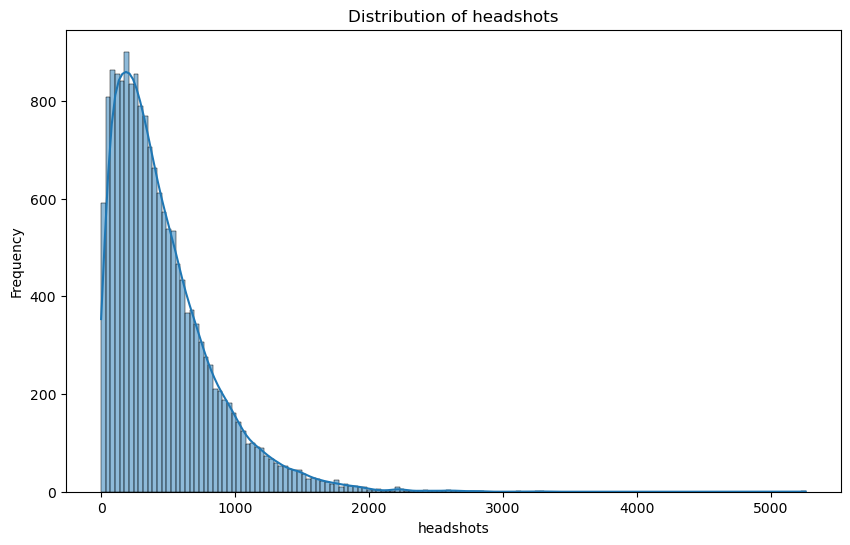

In [17]:
histogram_ploter('headshots')

**headshots**

The distribution is *right-skewed*, with a long tail extending to the right. This indicates that while most players have a lower number of headshots, there is a subset of players with significantly higher headshot counts.

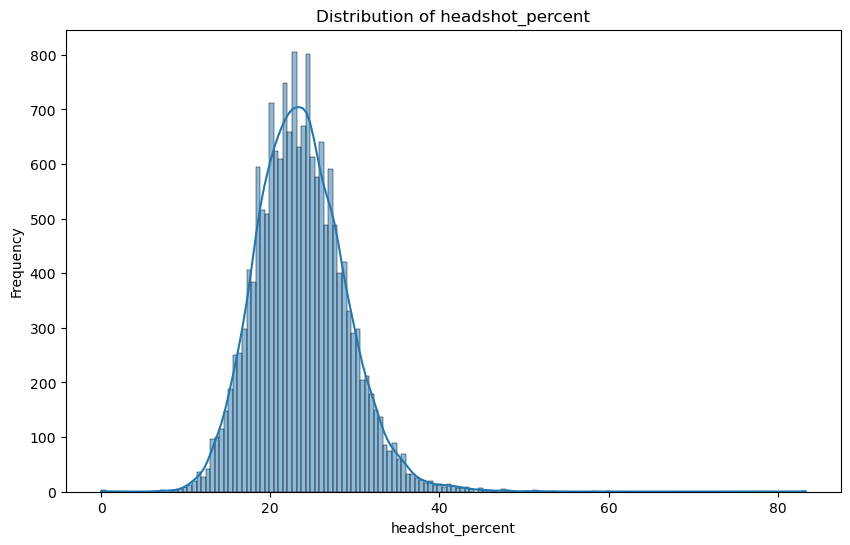

In [18]:
histogram_ploter('headshot_percent')

**Headshot Percentage**

The distribution is roughly bell-shaped, but it's not perfectly symmetrical; it shows a slight right skewness, with a tail extending towards the higher percentages. we can say this is almost a *Normal distribution*. 

Note- I mention it to be normal distribution even with the mild right skewed curve because of the large sample size of our data

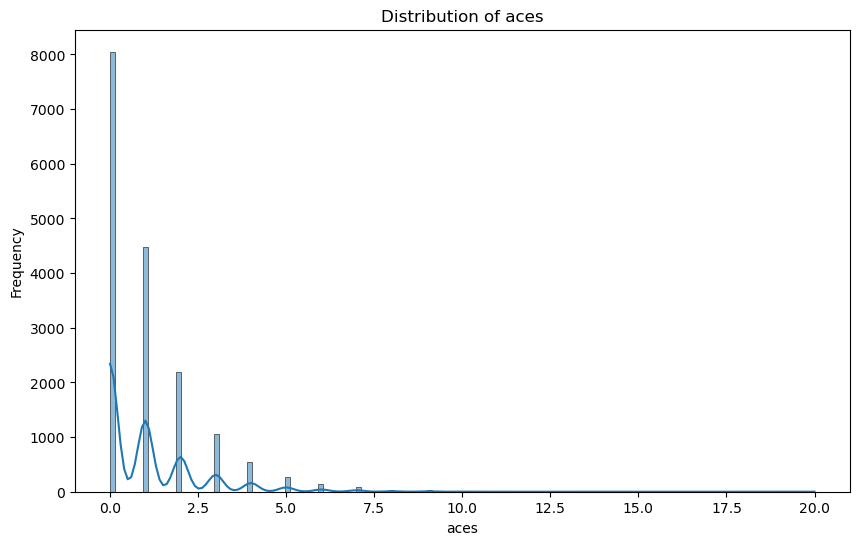

In [19]:
histogram_ploter('aces')

**Aces**

The histogram for the aces variable shows a *highly right-skewed distribution*.

Note - The variable aces (likely referring to the number of times a player has single-handedly eliminated all opponents in a round) is concentrated at lower values, with the majority of players having few or no aces.

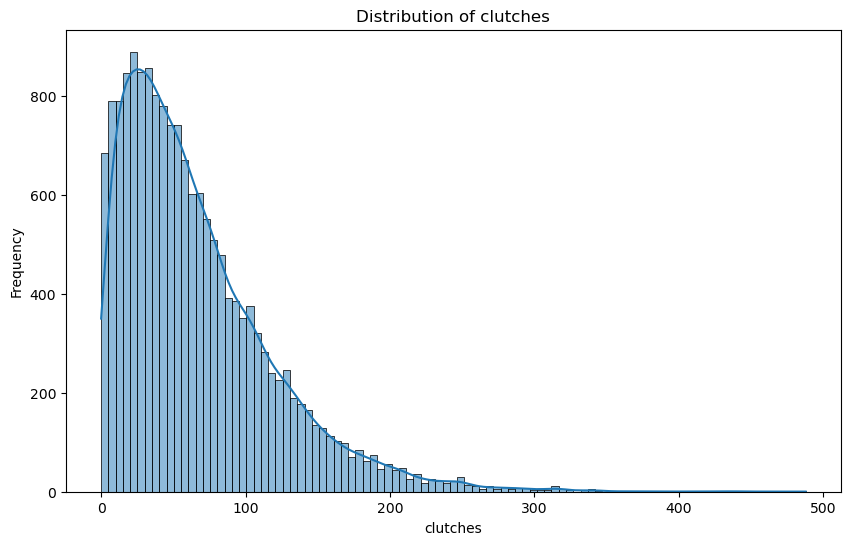

In [20]:
histogram_ploter('clutches')

**Clutches**

Similar to the aces variable, the clutches distribution is *right-skewed*. Most players have a lower number of clutches, but there's a long tail that suggests some players have achieved a high number of clutches.

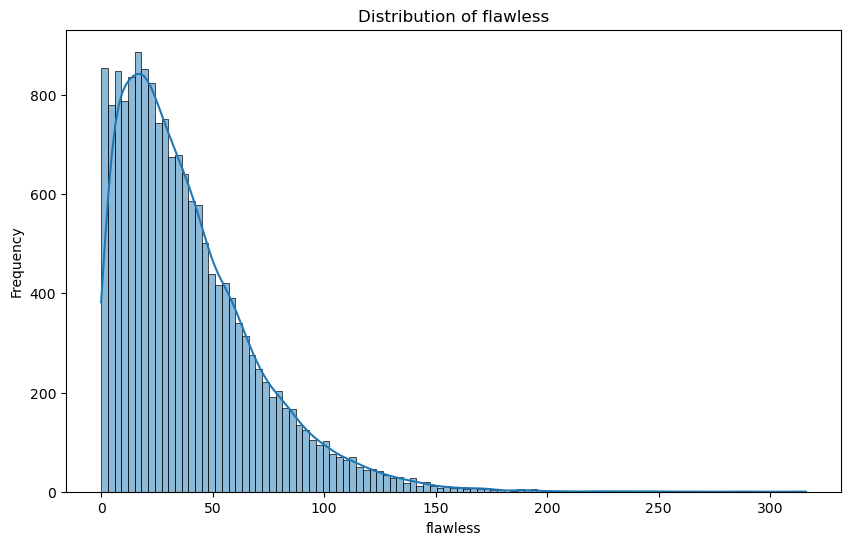

In [21]:
histogram_ploter('flawless')

**Flawless**

The distribution is right-skewed, which means most players have a low count of flawless rounds, with a declining number of players as the count increases.

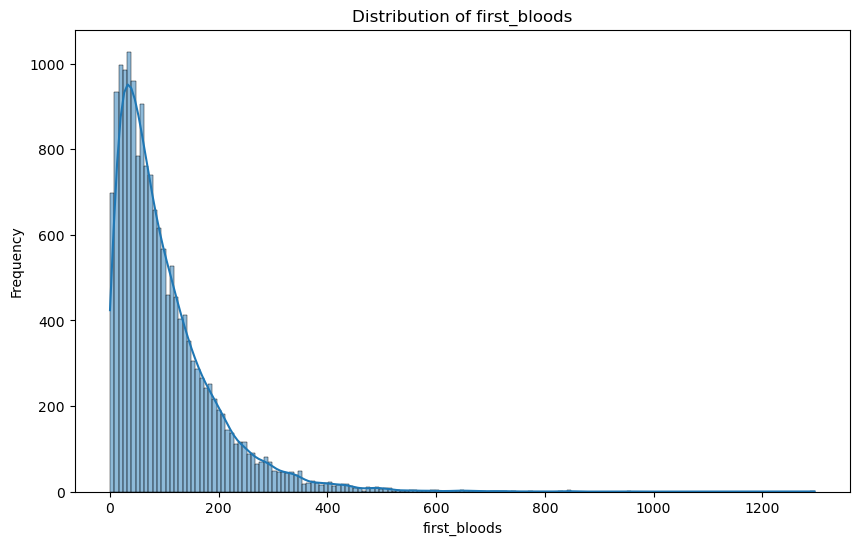

In [22]:
histogram_ploter('first_bloods')

**First Blood**

This is a right skewed distribution, only highranked/expert players will have more first bloods

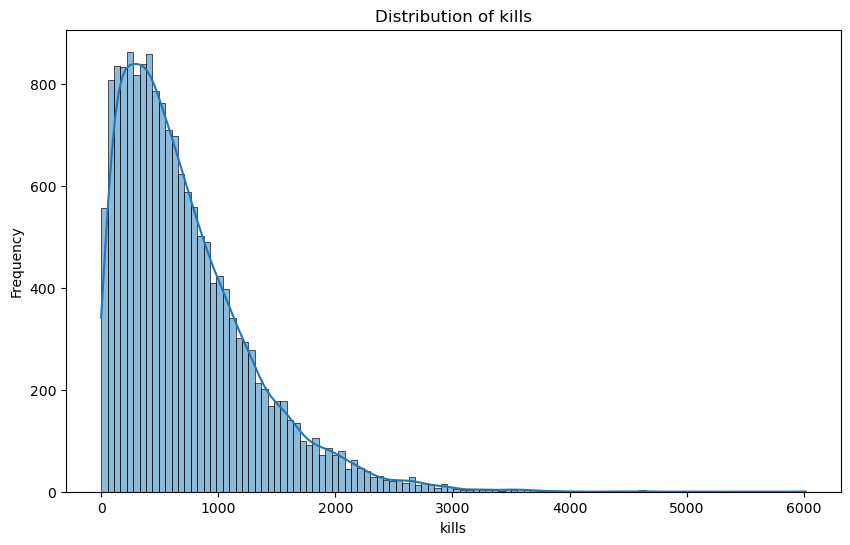

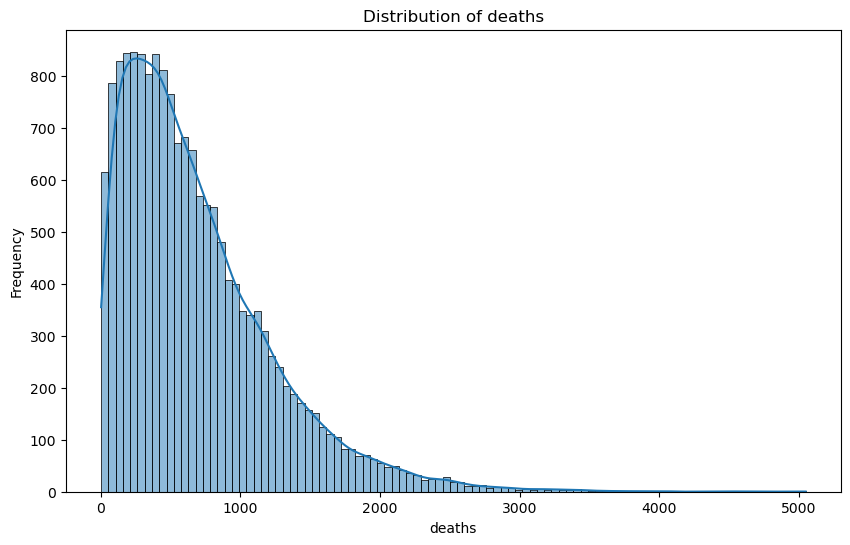

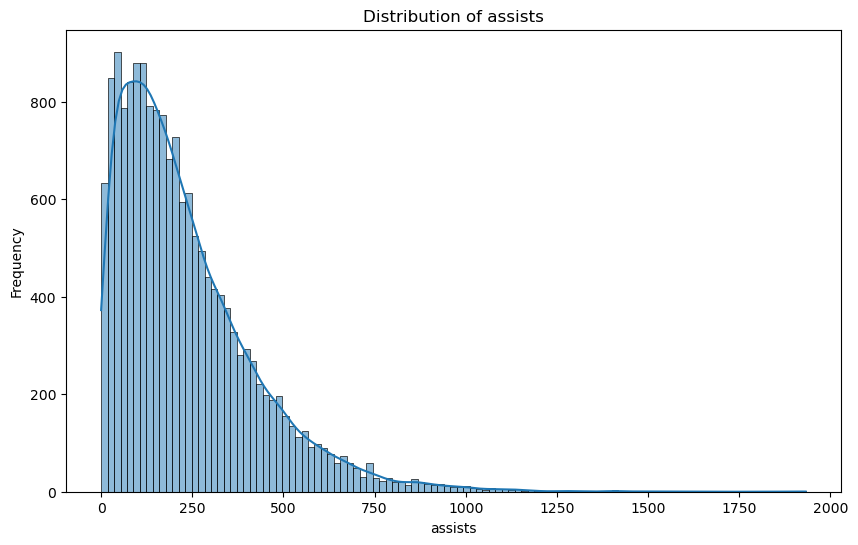

In [23]:
histogram_ploter('kills')
histogram_ploter('deaths')
histogram_ploter('assists')

**Kills , Deaths , Assits**

All these this features seem to be *right skewed distribution*. Only skilled players will have more number of kills, similar in all other features

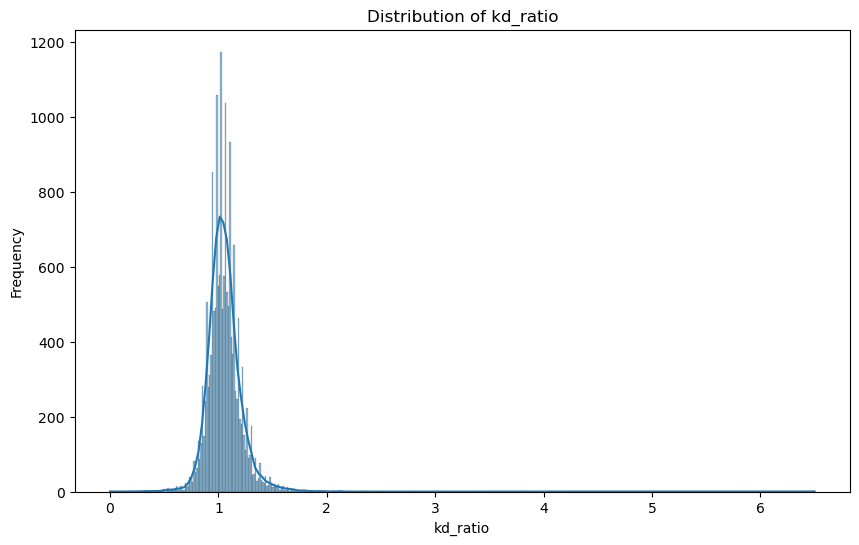

In [24]:
histogram_ploter('kd_ratio')

**KD ration**

The distribution is somewhat bell-shaped but shows a sharp peak at the center and heavy tails on both sides, indicating that it is not a perfect normal distribution and may be leptokurtic (having a sharper peak than the normal distribution)

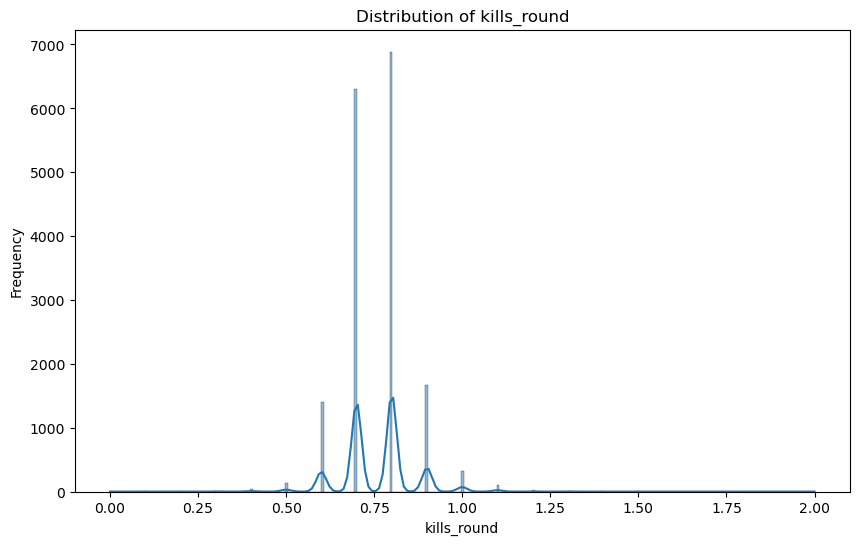

In [25]:
histogram_ploter('kills_round')

**kills_round**

The histogram for kills_round shows a distribution with several peaks, indicating it is a multimodal distribution

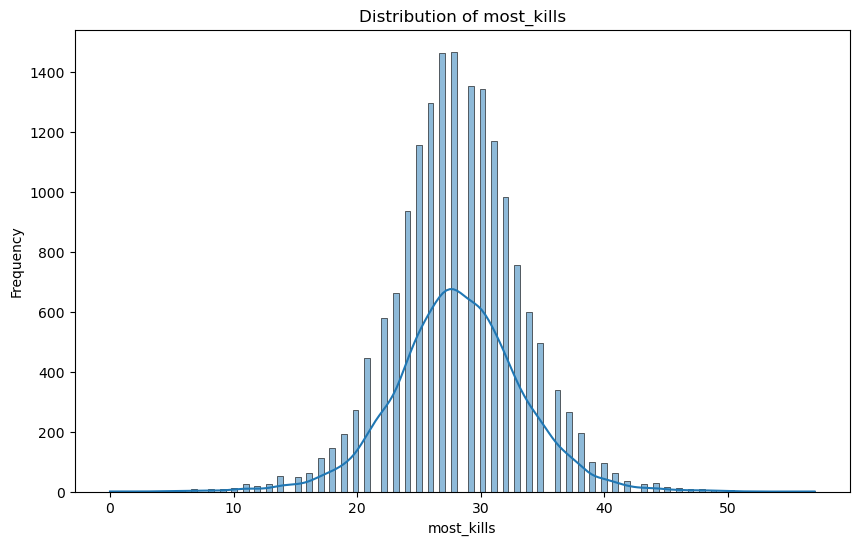

In [26]:
histogram_ploter('most_kills')

**Most kills**

This distribution seems to be a normal distribution.

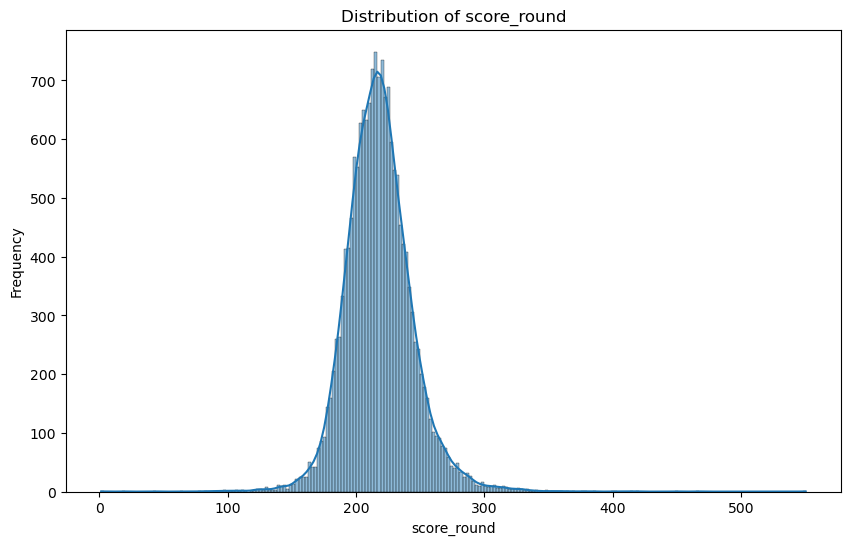

In [27]:
histogram_ploter('score_round')

**Score pre Round**

This also seems to be a normal distribution but very slightly skewed to the right, but we can ignore this because of the large sample size 

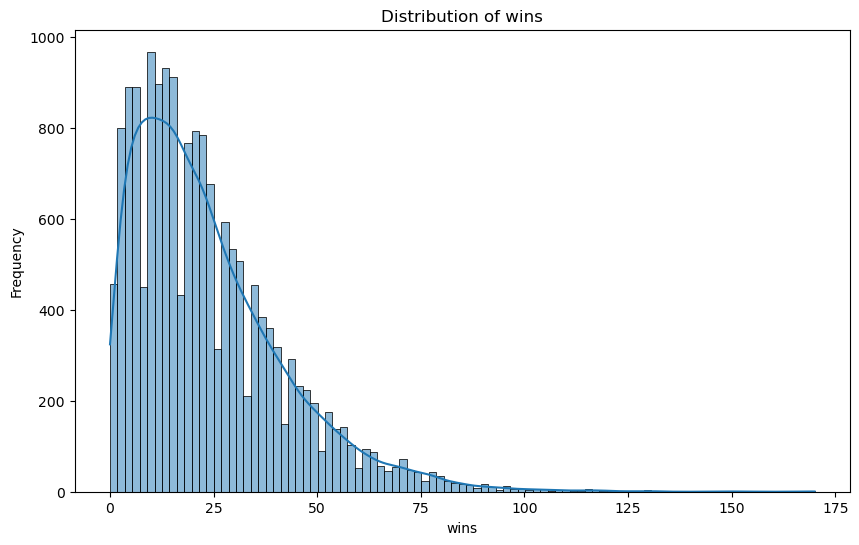

In [28]:
histogram_ploter('wins')

**Wins**

The histogram for the wins variable displays a right-skewed distribution. The mode is near the lower end, indicating that most players have a relatively small number of wins. 

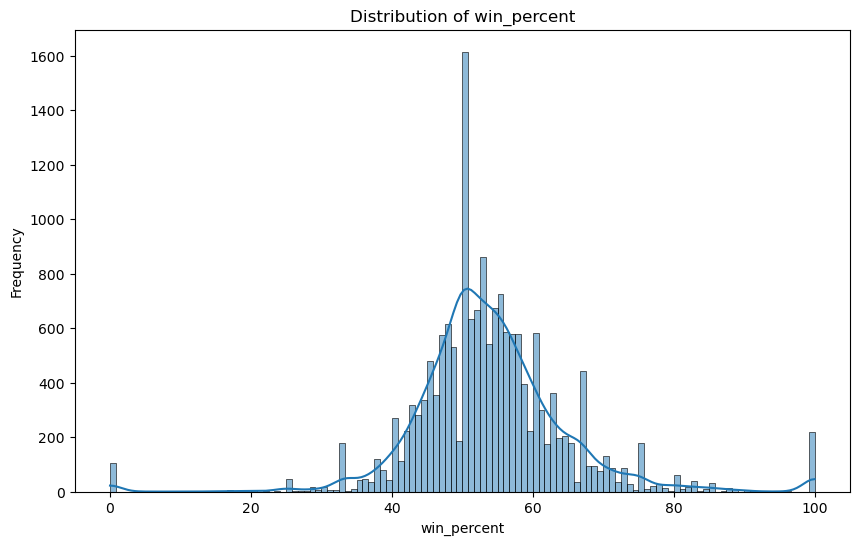

In [29]:
histogram_ploter('win_percent')

**Win Percentage**

The histogram for win_percent shows a distribution with several distinct peaks and a significant peak near 100%. This suggests that the data may be multimodal, indicating the presence of distinct subgroups within the players. The peak near 100% could indicate players who have played very few games and won all of them, while the other peaks could represent more typical win rates for players with more games played. The distribution is not symmetric and shows a higher concentration of values at the extremes, particularly near 100%, which is unusual. This has some outliers if we eliminate them we can fit it to a normal distribution

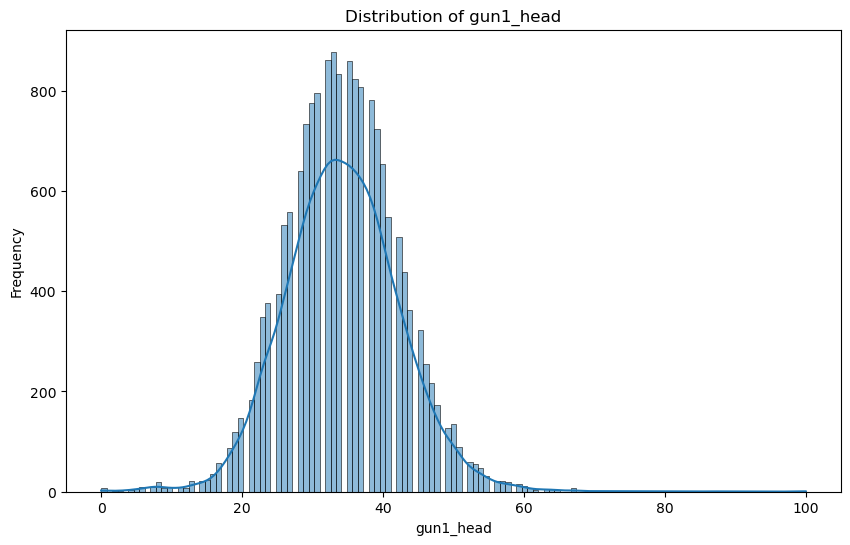

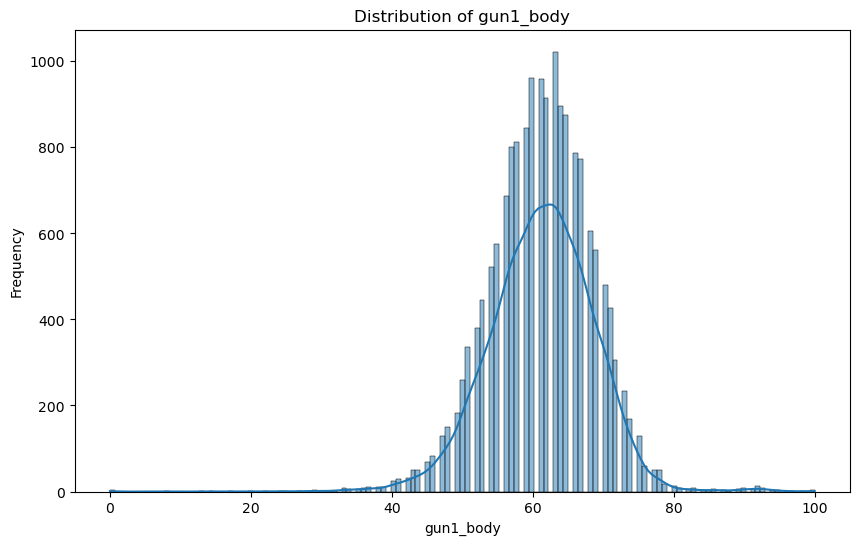

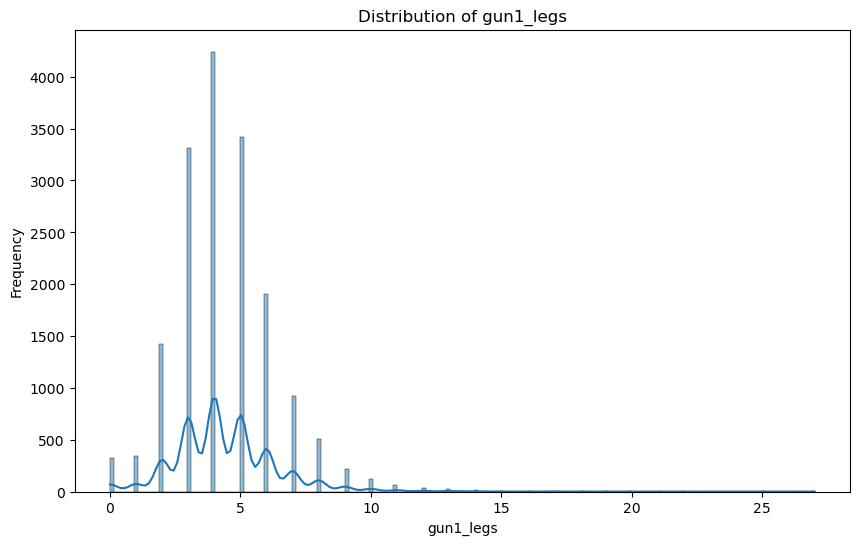

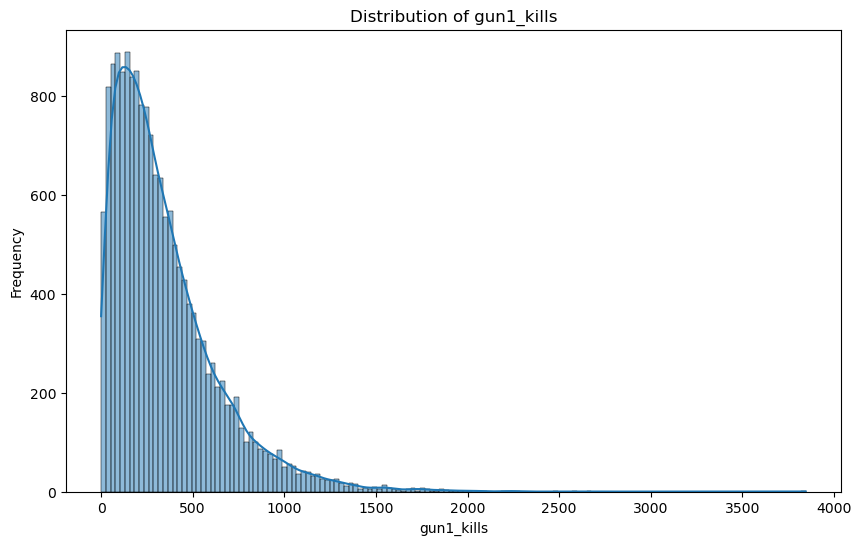

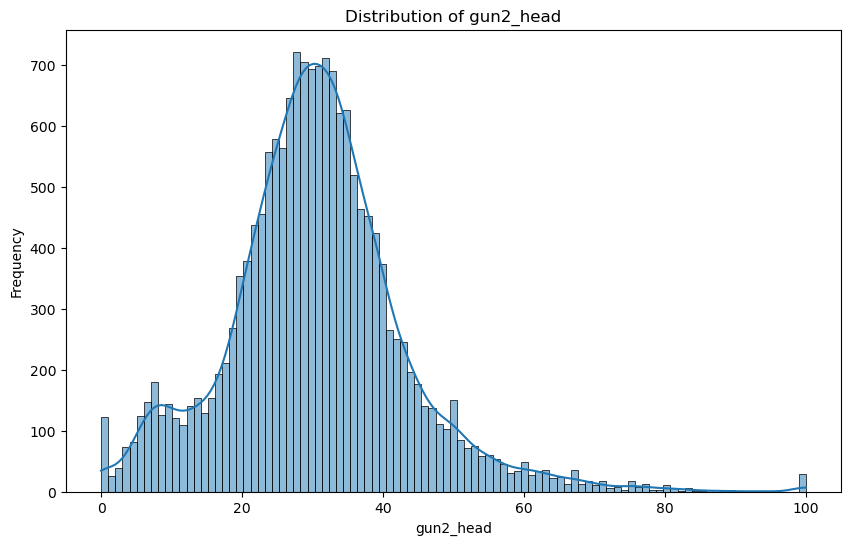

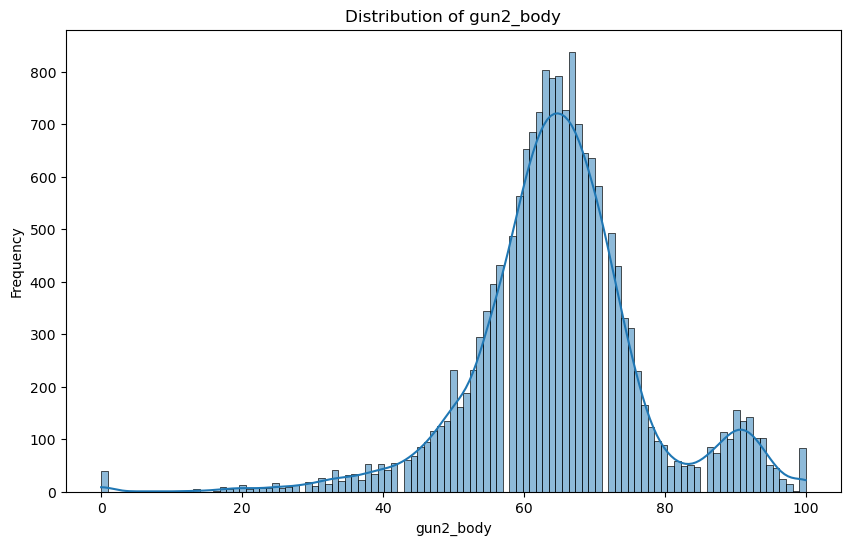

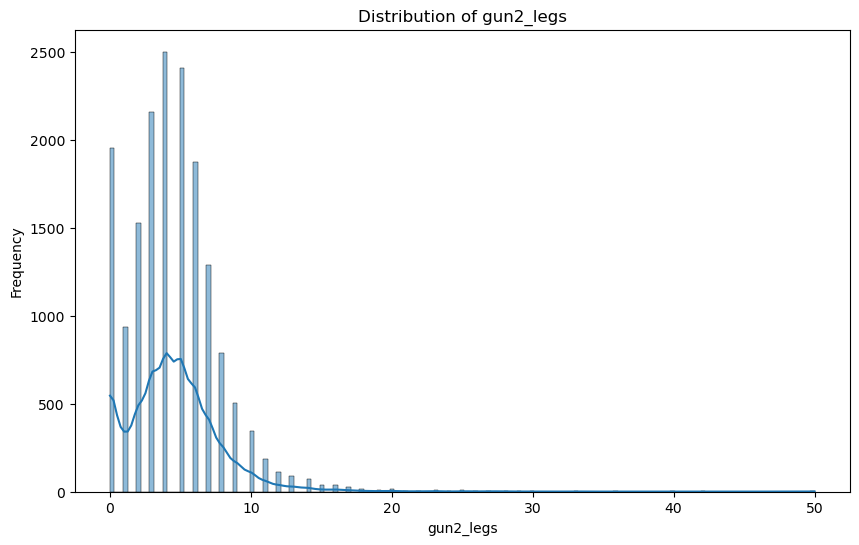

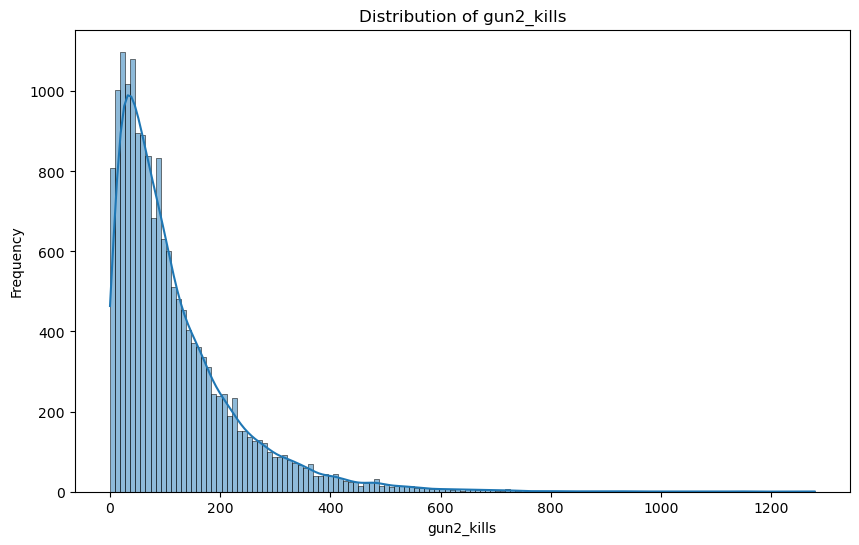

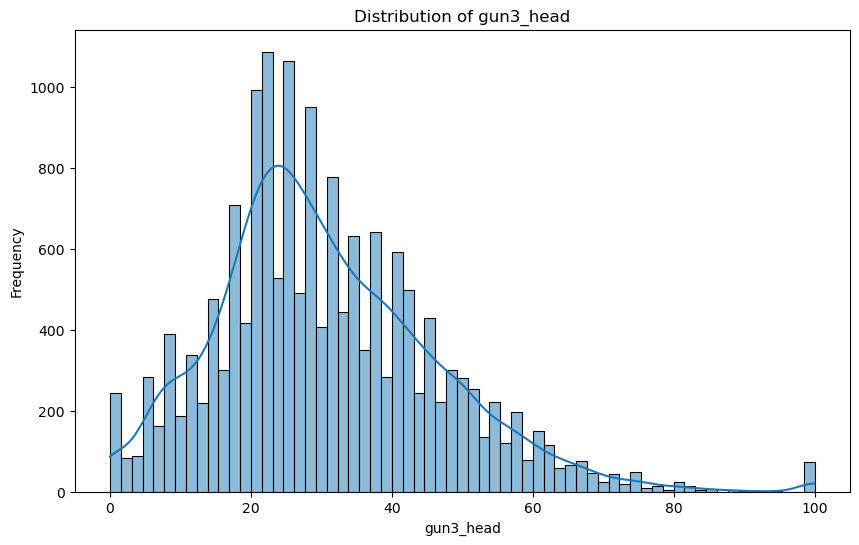

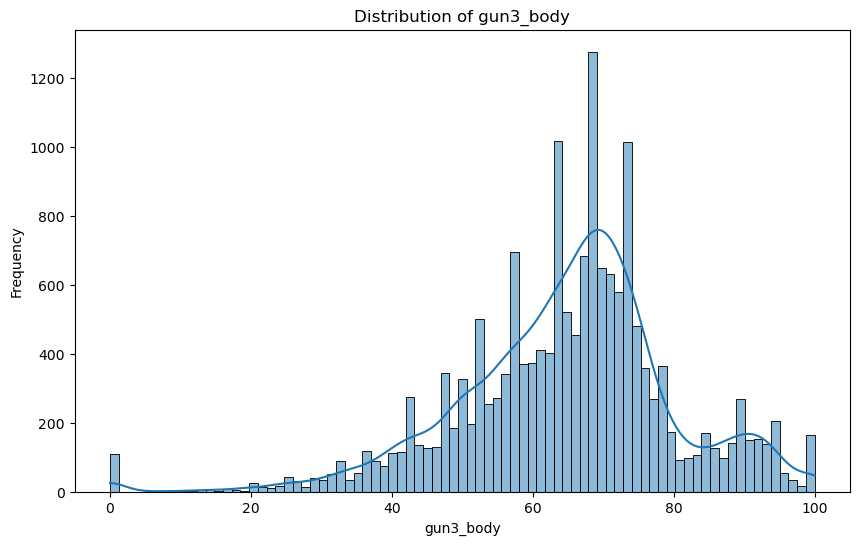

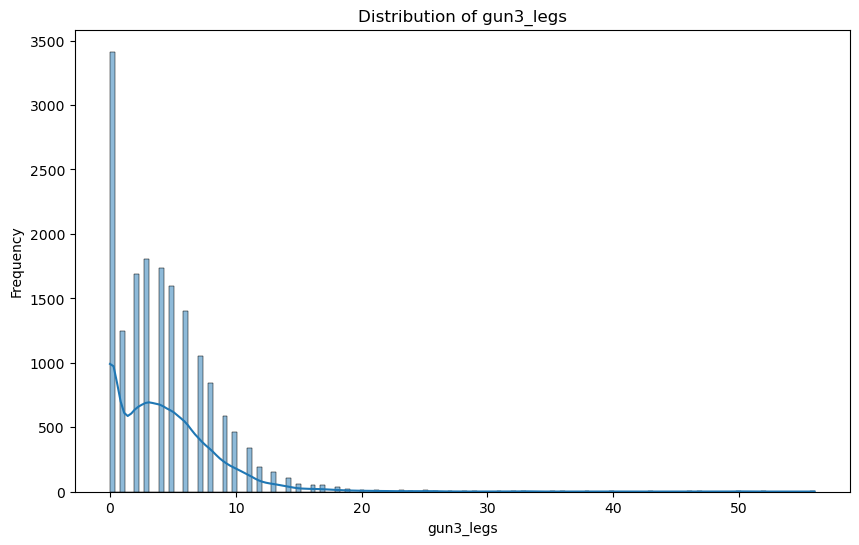

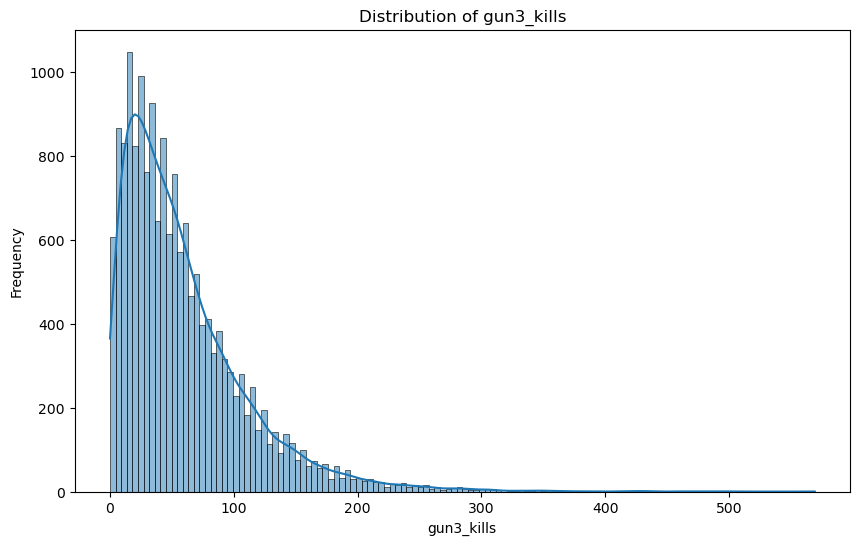

In [30]:
gun_stats = [ 'gun1_head', 'gun1_body', 'gun1_legs', 'gun1_kills',
        'gun2_head', 'gun2_body', 'gun2_legs', 'gun2_kills',
        'gun3_head', 'gun3_body', 'gun3_legs', 'gun3_kills']

for column in gun_stats:
    histogram_ploter(column)

**gun1_head**

this is a normal distribution which is alongated towards right.

**gun1_body**

this is also a normal distribution

**gun1_legs**

The histogram for the gun1_legs variable shows a highly right-skewed distribution with a significant concentration of values at the lower end of the scale.

**gun1_kills**

This histogram shows that kill by gun1 is a right skewed distribution.

**gun2_head**

The histogram for gun2_head indicates a distribution that is somewhat bell-shaped but with a right skew. The data is concentrated around a central range, suggesting that there is a common number of headshots that most players achieve with the second gun. 

**gun2_body**

The distribution is somewhat bell-shaped with a peak, suggesting a common range for body shots that most players achieve. aslo maybe a bimodal distribution because of a small hump the the end

**gun2_legs**

The distribution is highly right-skewed, similar to the gun1_legs distribution previously discussed.

**gun2_kills**

The histogram for gun2_kills displays a right-skewed distribution. There is a steep decline from the peak at the lower end, indicating that most players have a smaller number of kills with gun2.

**gun3_head , gun3_body**

Both distributions are somewhat bell-shaped with a clear peak, indicating a common range where most players achieve head and body shots with gun3.
There's a right skew in both, more pronounced for headshots, which suggests that while most players achieve a moderate number of shots, a few players have much higher counts.

**gun3_legs**

The distribution is extremely right-skewed with a sharp peak near zero. This suggests leg shots with gun3 are quite rare.

**gun3_kills**

This distribution is also right-skewed, with most values concentrated at the lower end and a tail stretching to the right.


## Which independent variables are useful to predict a target (dependent variable)?

### Converting Object dtype to catagorical with cat.codes to reduce the complexity

In [31]:
for column in sampled_dataset.columns:
    if sampled_dataset[column].dtype == 'object':
        sampled_dataset[column] = sampled_dataset[column].astype('category').cat.codes

### the most useful Independent Variables can be statistically determined using the following methods:

1. Univariate Selection
2. Feature Importance
3. Correlation Matrix with Heatmap

### Univariate Selection

In [32]:
X = sampled_dataset.drop('rating', axis=1)  # Features
y = sampled_dataset['rating']  #  'rating' is the target variable
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X.select_dtypes(include=['number']), y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # naming the dataframe columns

univariate_scores = featureScores.nlargest(38, 'Score')
univariate_scores

,Specs,Score
10,kills,1.189519e+06
11,deaths,1.011508e+06
4,headshots,8.329904e+05
26,gun1_kills,5.691463e+05
12,assists,3.323457e+05
9,first_bloods,1.841055e+05
31,gun2_kills,1.639173e+05
7,clutches,1.002714e+05
36,gun3_kills,8.519185e+04
2,tag,7.719356e+04


### Feature Importance with RandomForestClassifier()

In [33]:
# Feature Importance
model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance_sorted = feature_importances.sort_values('importance', ascending=False)
feature_importance_sorted

,feature,importance
18,win_percent,0.062741
17,wins,0.045793
4,headshots,0.045344
10,kills,0.037111
9,first_bloods,0.036434
12,assists,0.035930
26,gun1_kills,0.035867
2,tag,0.034652
31,gun2_kills,0.033113
7,clutches,0.033093


### Correlation Matrix with Heatmap

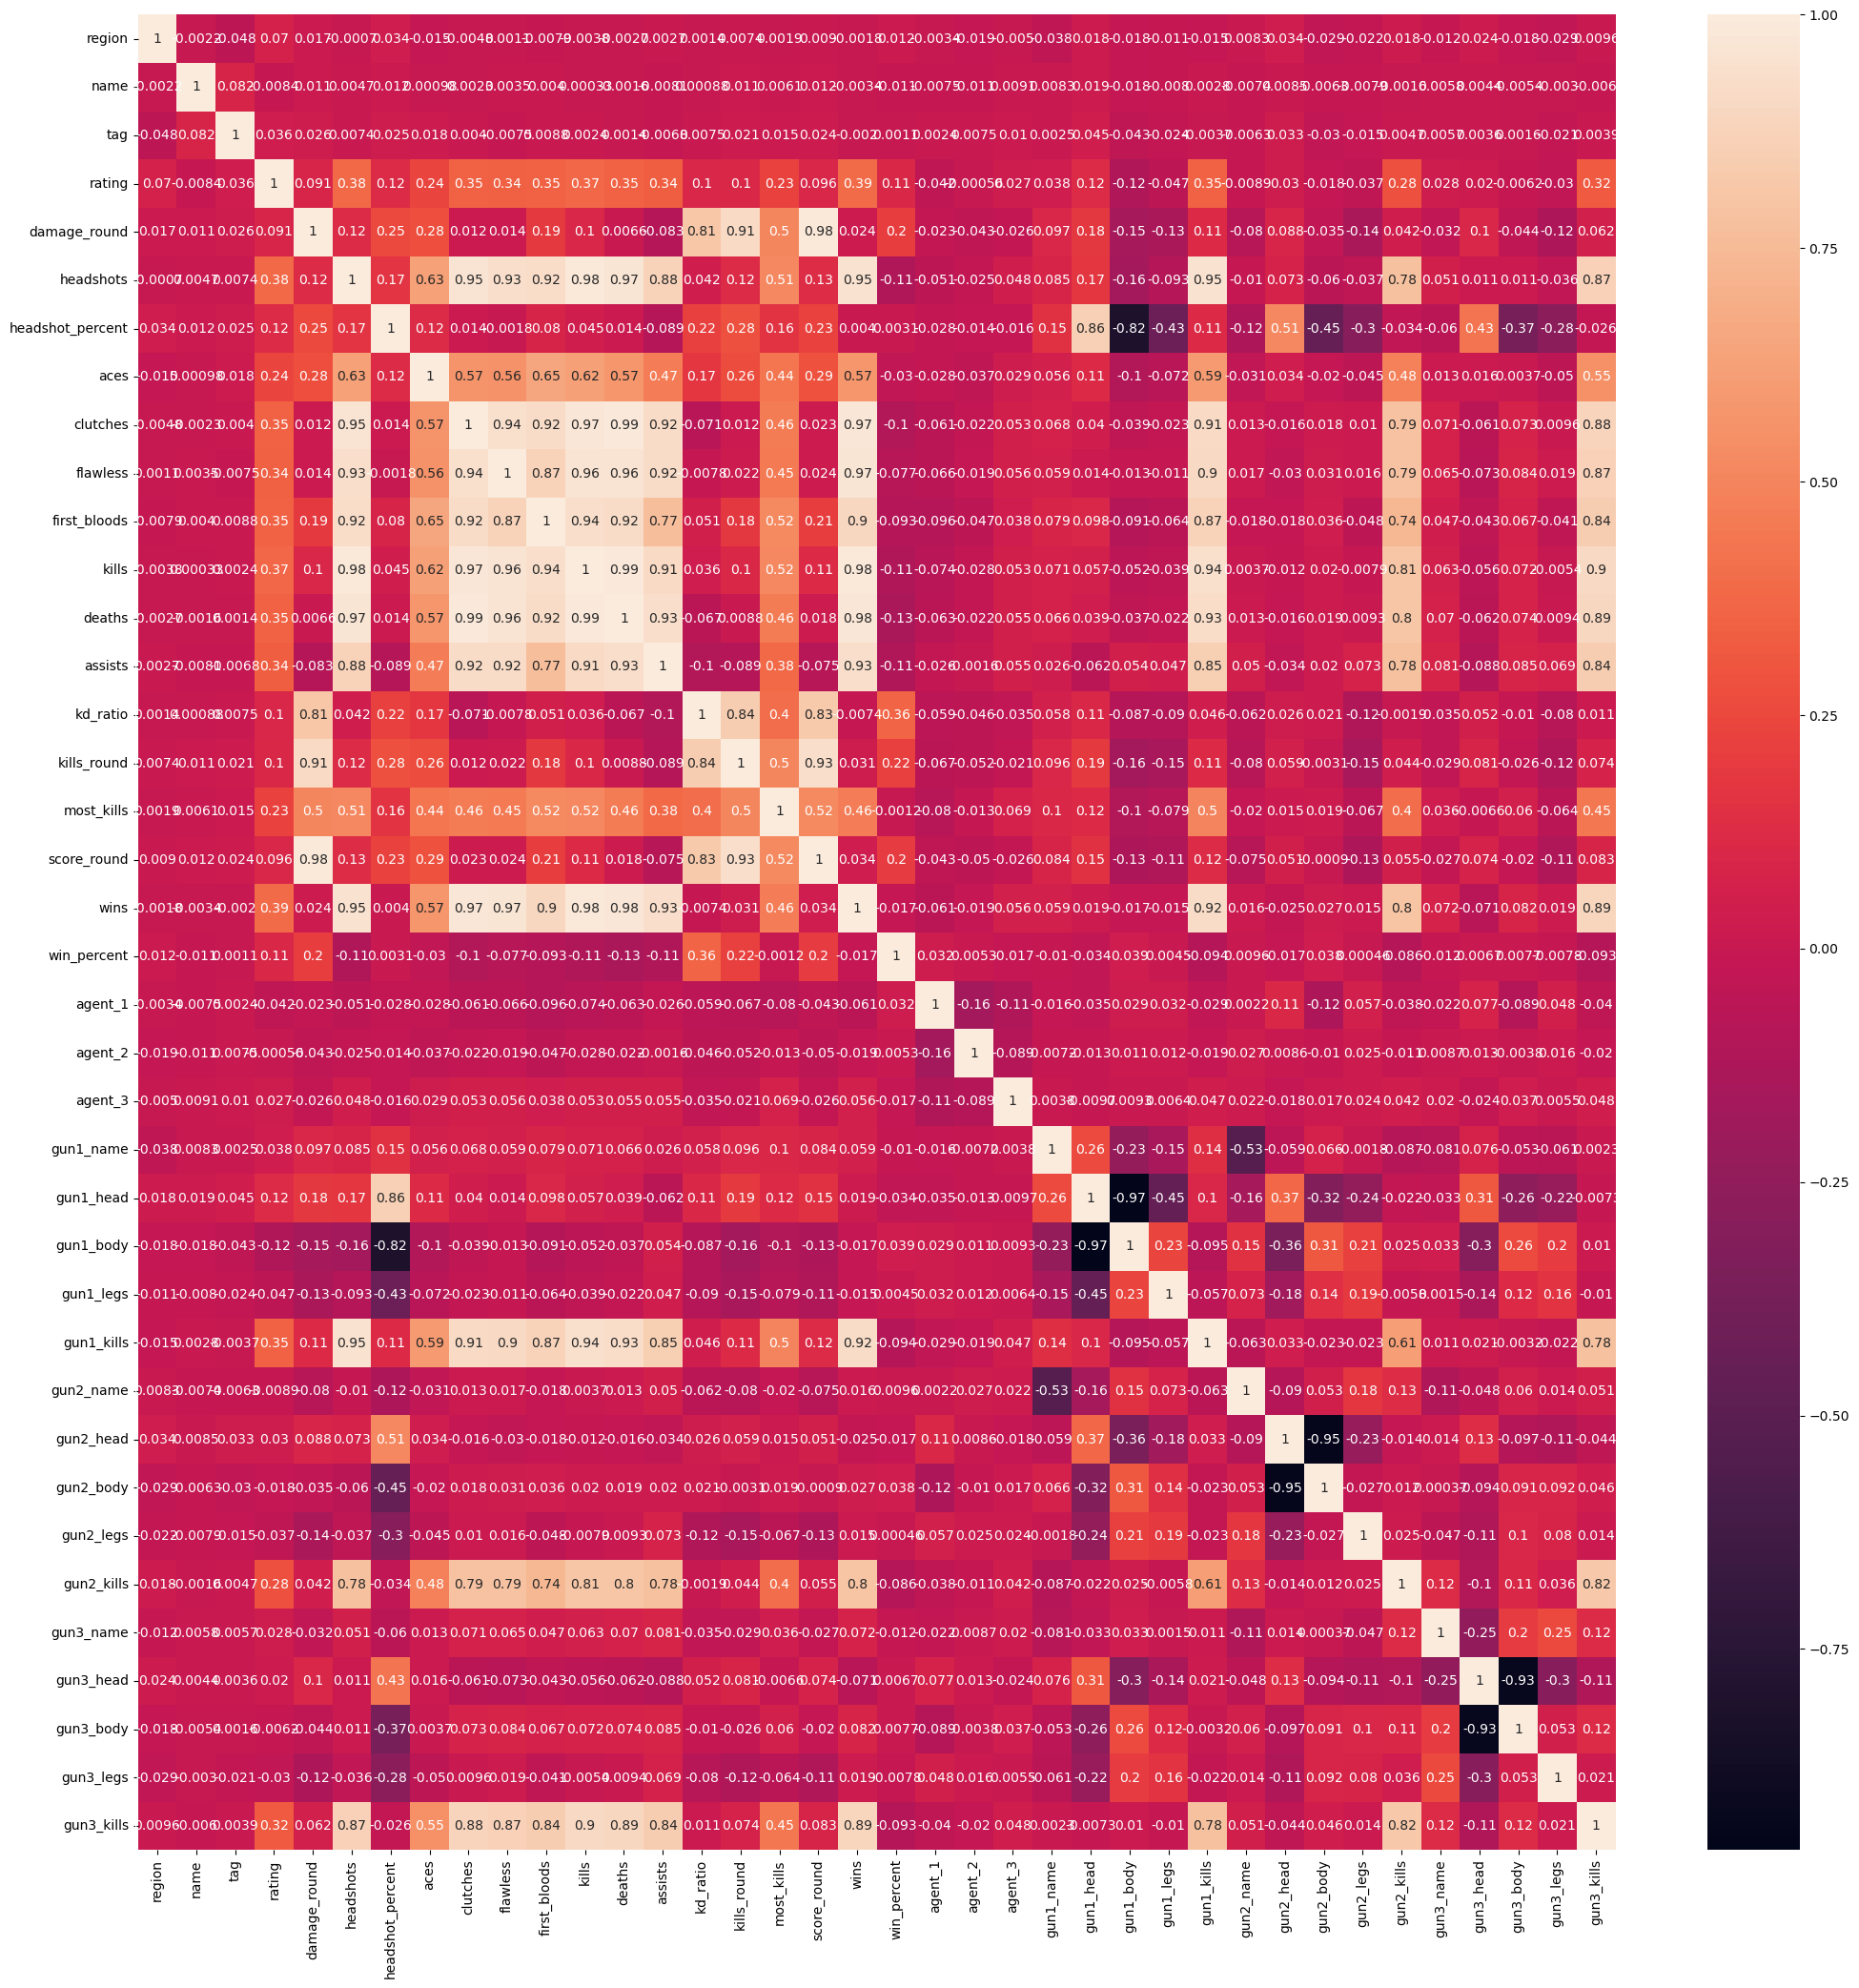

In [34]:
corrmat = sampled_dataset.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corrmat, annot=True)
plt.show()

From the above all analysis, we can conclude that

**In Univariate** 
This score represents the result of a statistical test that measures the strength of the relationship between each individual feature and the target variable

1. Kills
2. Deaths
3. Headshots
4. Gun1 Kills
5. Assists
6. Gun2 Kills
7. Clutches
8. First Bloods
These features have significantly higher scores compared to the rest.

**In Feature Importance**
Feature importance is calculated based on the Random Forest model's ability to use these features to reduce impurity

1. Win Percent
2. Wins
3. Headshots
4. Kills
5. Clutches
6. Gun1 Kills
7. First Bloods
8. Assists
There's some overlap between the univariate scores and feature importance results

**Correlation Matrix**
with looking at Correlation matrix we can see that 
1. kills
2. assists
3. deaths
4. aces
5. flawless
6. clutches
7. First bloods
8. gun1_kills
9. kd_ration

very correlated wit the target variable. from the above results and Domain knowledge we can use 'kills', 'deaths', 'headshots', 'gun1_kills', 'assists', 'clutches', 'first_bloods', 'win_percent', 'wins', 'aces' features for building a predictive model

## In the predictor variables independent of all the other predictor variables?

We can know the correlation between the independent variables from correlation matrix 

In [35]:
correlation_matrix = sampled_dataset.corr()

# Define a threshold for strong correlations
threshold = 0.95

# Find correlated variables
correlated_vars = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            correlated_vars.add((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Print correlated variable pairs
for var_pair in correlated_vars:
    print(var_pair)

('gun1_head', 'gun1_body')
('headshots', 'wins')
('flawless', 'kills')
('deaths', 'wins')
('flawless', 'wins')
('kills', 'wins')
('clutches', 'kills')
('damage_round', 'score_round')
('flawless', 'deaths')
('headshots', 'kills')
('headshots', 'clutches')
('clutches', 'deaths')
('headshots', 'deaths')
('kills', 'deaths')
('clutches', 'wins')


from the above output we can conclude that many are highly correlated with each other.
we need to carefully choose the features which are not very highly correlated among there to reduce multicollinearity.
which can affect the performance and interpretability of some predictive models, particularly those that rely on the independence assumption

So, lets eleminate some features which we selected previously
we can remove 'wins', 'deaths' as they are correlated with many other selected features. 

## Which predictor variables are the most important?

From 
1. Univariate Selection
2. Feature Importance
3. Correlation Matrix with Heatmap

we could figure out around 9 features which are most important in this dataset
**'kills', 'headshots', 'gun1_kills', 'assists', 'clutches', 'first_bloods', 'win_percent', 'aces', 'headshot_percent'**

we had to remove some features/ predictor even though they had good scores in Univariate Selection
and Feature Importance, due to the multicollinearity.

we want to reduce multicollinearity. which can affect the performance and interpretability of some predictive models, particularly those that rely on the independence assumption

# Do the training and test sets have the same data? 

With the dataset, we are not provided with separate train and test data.
typically split the original dataset into two separate sets: one for training the model and the other for testing its performance.



In [36]:
from sklearn.model_selection import train_test_split
important_features = [
    'kills', 'headshots', 'gun1_kills', 'assists', 'clutches', 'first_bloods', 'win_percent', 'aces', 'headshot_percent'
]

# Subsetting the original filled data to include only the important features
X_important_features = X[important_features]

# Splitting the data into training and testing sets with only the selected important features
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_important_features, y, test_size=0.2, random_state=42
)

In [37]:
common_rows = pd.merge(X_train_imp, X_test_imp, how='inner')
if common_rows.empty:
    print("There are no identical rows in the training and testing datasets.")
else:
    print("There are identical rows in the training and testing datasets.")


There are no identical rows in the training and testing datasets.


## Do the ranges of the predictor variables make sense?

In [38]:
numeric_data = sampled_dataset.select_dtypes(include=[np.number])
range_of_numeric_data = numeric_data.max() - numeric_data.min()
range_of_numeric_data

region                  4.0
name                16536.0
tag                  9687.0
rating                  9.0
damage_round          330.8
headshots            5261.0
headshot_percent       83.3
aces                   20.0
clutches              488.0
flawless              316.0
first_bloods         1296.0
kills                6016.0
deaths               5044.0
assists              1932.0
kd_ratio                6.5
kills_round             2.0
most_kills             57.0
score_round           549.1
wins                  170.0
win_percent           100.0
agent_1                18.0
agent_2                18.0
agent_3                18.0
gun1_name              13.0
gun1_head             100.0
gun1_body             100.0
gun1_legs              27.0
gun1_kills           3845.0
gun2_name              16.0
gun2_head             100.0
gun2_body             100.0
gun2_legs              50.0
gun2_kills           1279.0
gun3_name              16.0
gun3_head             100.0
gun3_body           

Yes, ranges of the features seems to be in proper ranges and we do not see any abnormality

## What are the distributions of the predictor variables?   

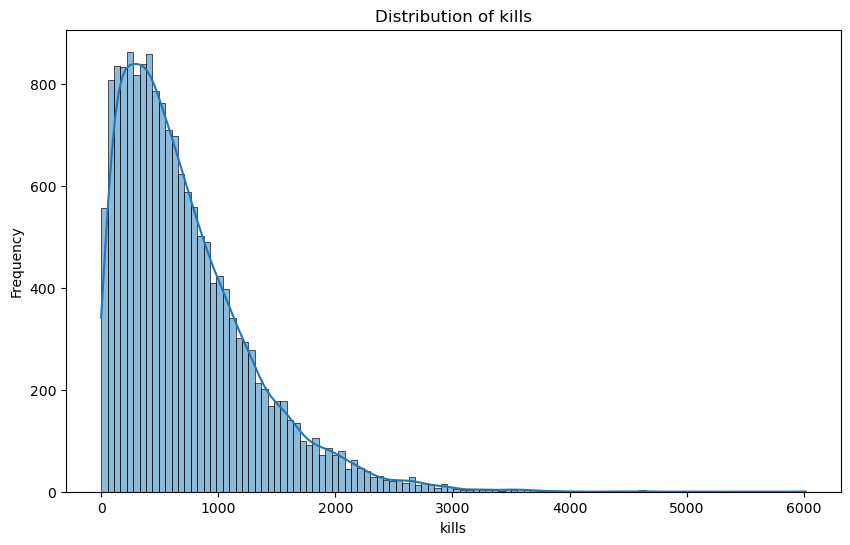

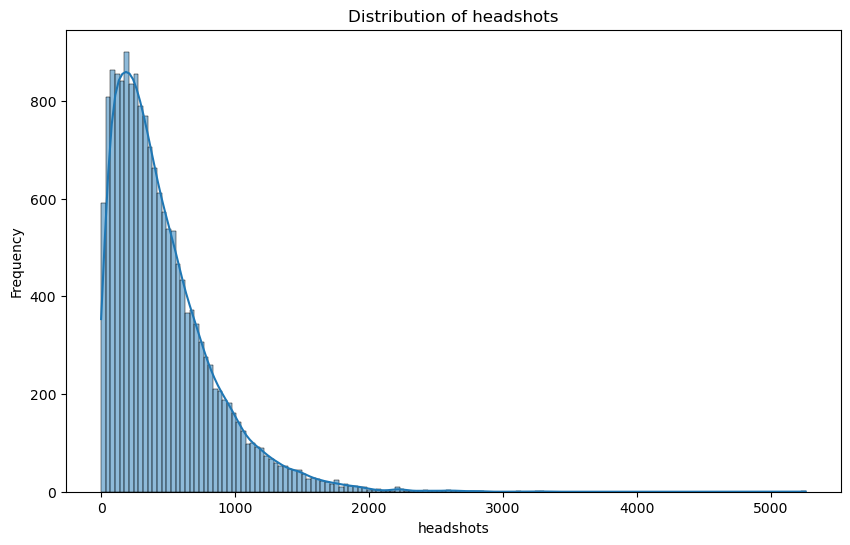

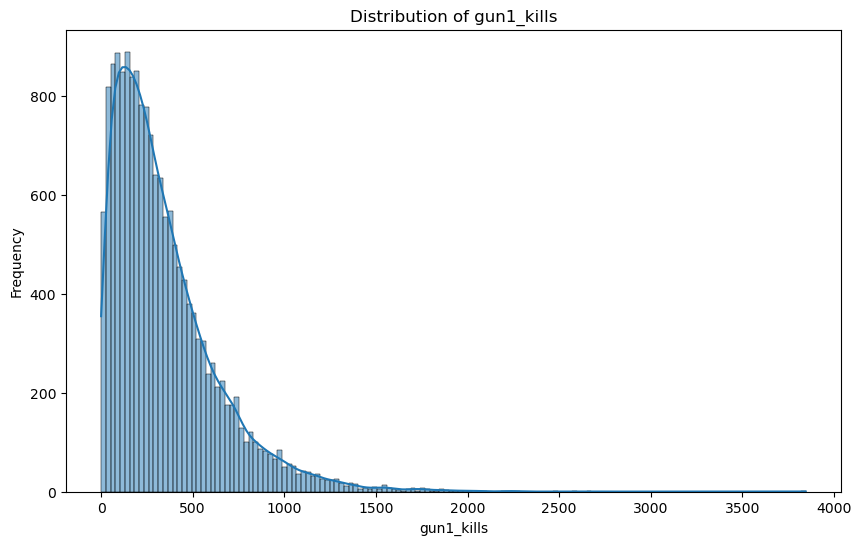

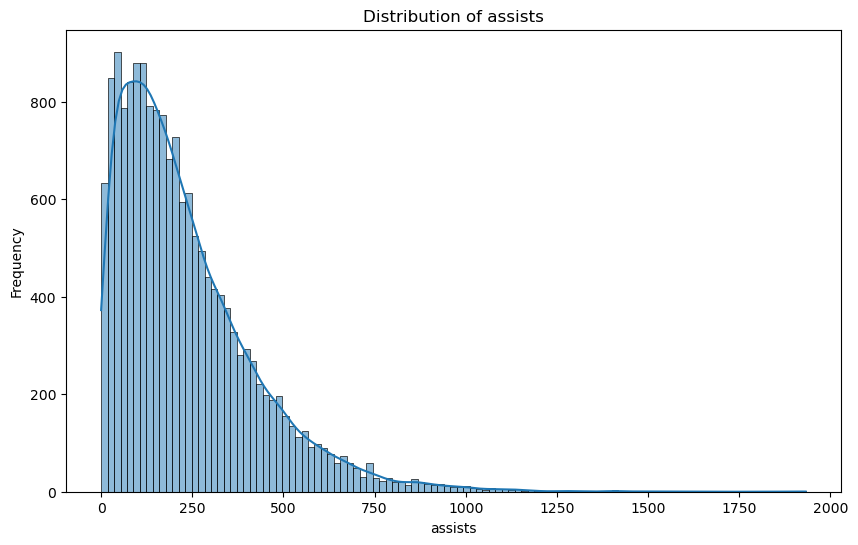

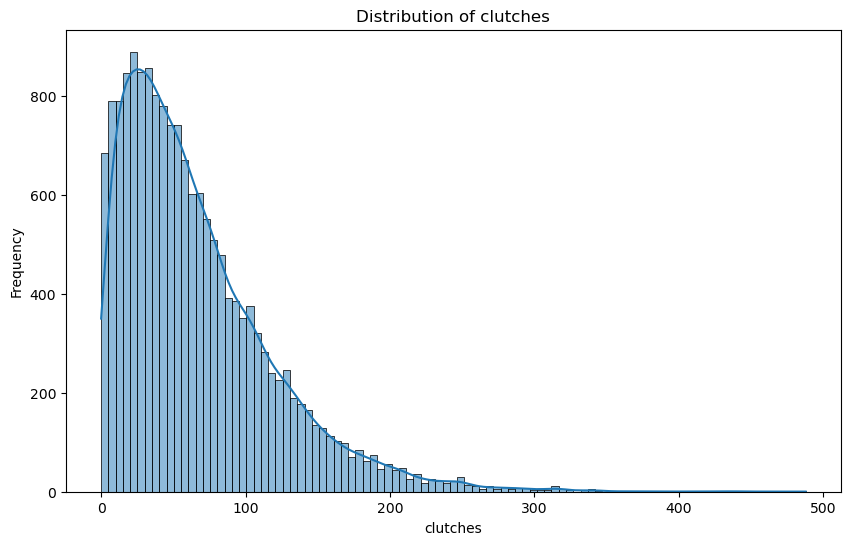

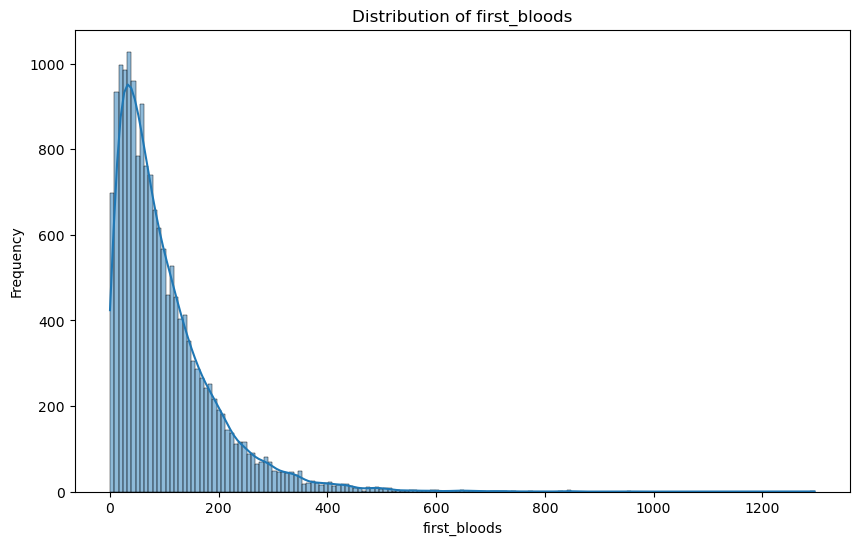

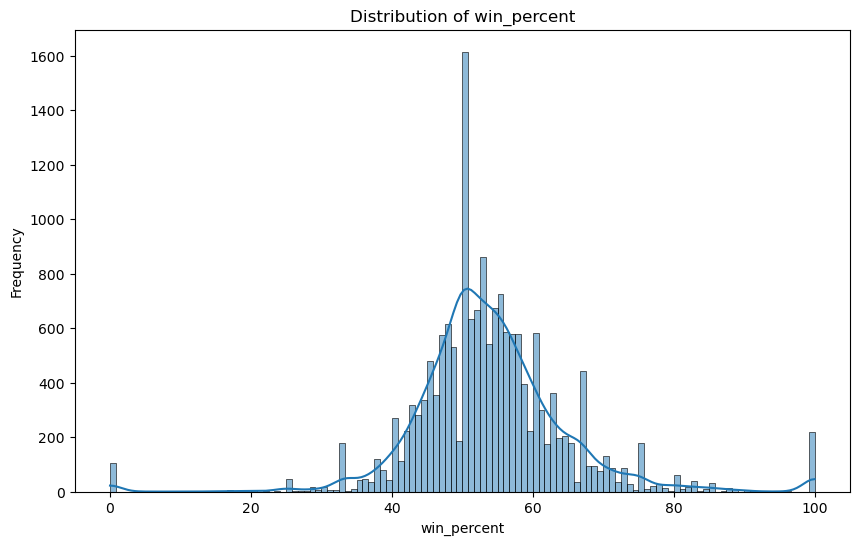

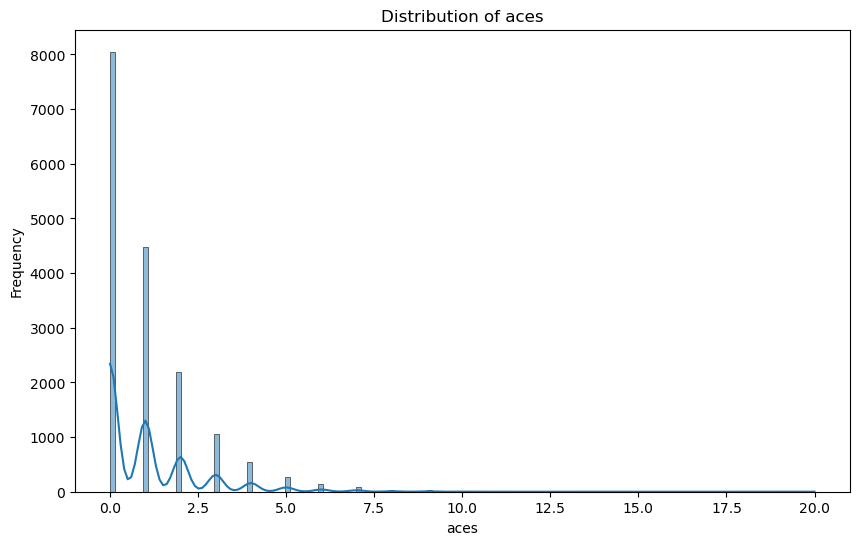

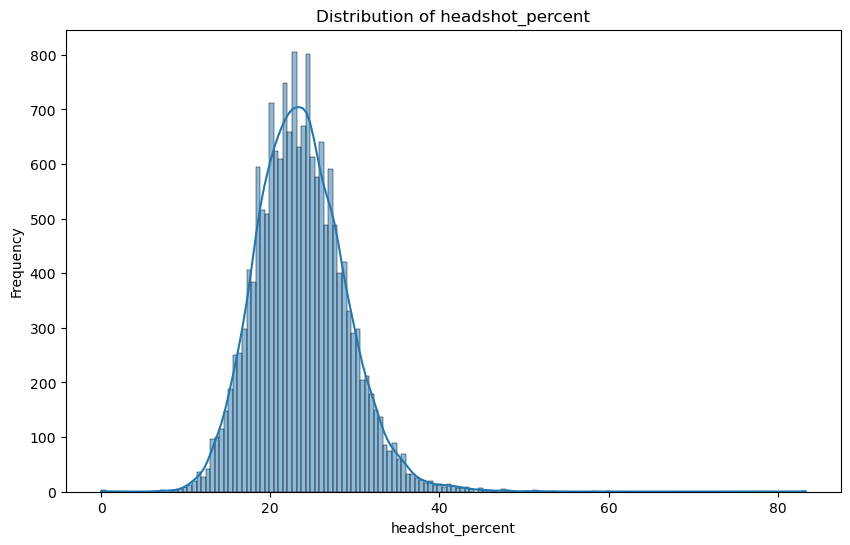

In [39]:
selected_predictor = [
    'kills', 'headshots', 'gun1_kills', 'assists', 'clutches', 'first_bloods', 'win_percent', 'aces', 'headshot_percent'
]
for c in selected_predictor:
    histogram_ploter(c)

**headshots**

The distribution is *right-skewed*, with a long tail extending to the right. This indicates that while most players have a lower number of headshots, there is a subset of players with significantly higher headshot counts.

**gun1_kills**

This histogram shows that kill by gun1 is a right-skewed distribution.

**Kills & Assits**

These features seem to be right-skewed distribution.

**Aces**

The histogram for the aces variable shows a highly right-skewed distribution.

Note - The variable aces (likely referring to the number of times a player has single-handedly eliminated all opponents in a round) is concentrated at lower values, with the majority of players having few or no aces.

**Clutches**

Similar to the aces variable, the clutches distribution is *right-skewed*. Most players have a lower number of clutches, but there's a long tail that suggests some players have achieved a high number of clutches.

**First Blood**

This is a right skewed distribution, only highranked/expert players will have more first bloods.

**Win Percentage**

The histogram for win_percent shows a distribution with several distinct peaks and a significant peak near 100%. This suggests that the data may be multimodal, indicating the presence of distinct subgroups within the players. The peak near 100% could indicate players who have played very few games and won all of them, while the other peaks could represent more typical win rates for players with more games played. The distribution is not symmetric and shows a higher concentration of values at the extremes, particularly near 100%, which is unusual. This has some outliers if we eliminate them we can fit it to a normal distribution

**Headshot Percentage**

The distribution is roughly bell-shaped, but it's not perfectly symmetrical; it shows a slight right skewness, with a tail extending towards the higher percentages. we can say this is almost a *Normal distribution*. 

Note- I mention it to be normal distribution even with the mild right skewed curve because of the large sample size of our data


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train_imp, y_train_imp)

# Predicting on the test set
y_pred = model.predict(X_test_imp)

# Evaluating the model
accuracy = accuracy_score(y_test_imp, y_pred)
report = classification_report(y_test_imp, y_pred)
conf_matrix = confusion_matrix(y_test_imp, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("conf_matrix:\n", conf_matrix)


Accuracy: 0.5839243498817966
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.66      0.85      0.74      2004
           4       0.35      0.20      0.26       835
           5       0.35      0.23      0.27       445
           6       0.00      0.00      0.00         1
           8       0.08      0.01      0.02        97
           9       0.00      0.00      0.00         1

    accuracy                           0.58      3384
   macro avg       0.21      0.18      0.18      3384
weighted avg       0.52      0.58      0.54      3384

conf_matrix:
 [[   0    1    0    0    0    0    0]
 [   0 1704  205   90    0    5    0]
 [   0  597  170   67    0    1    0]
 [   0  247   92  101    0    5    0]
 [   0    0    1    0    0    0    0]
 [   0   47   16   33    0    1    0]
 [   0    1    0    0    0    0    0]]


C:\Users\Mukul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mukul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mukul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize and train the SVM model
svm_model = SVC(decision_function_shape='ovo')  # One-vs-One approach
svm_model.fit(X_train_imp, y_train_imp)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_imp)

# Evaluate the model
accuracy_svm = accuracy_score(y_test_imp, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test_imp, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM Confusion Matrix:\n", conf_matrix_svm)


SVM Accuracy: 0.5951536643026005
SVM Confusion Matrix:
 [[   0    0    0    1    0    0    0]
 [   0 1960    0   43    0    1    0]
 [   0  798    0   37    0    0    0]
 [   0  388    0   54    0    3    0]
 [   0    1    0    0    0    0    0]
 [   0   76    0   21    0    0    0]
 [   0    1    0    0    0    0    0]]


In [42]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

if X_train_imp.columns.duplicated().any():
    print("Duplicate columns found. Renaming duplicates.")
    X_train_imp = X_train_imp.loc[:, ~X_train_imp.columns.duplicated()]  # Remove duplicate columns
    X_test_imp = X_test_imp.loc[:, ~X_test_imp.columns.duplicated()]  # Apply the same to the test set

# Train the model again
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_imp, y_train_imp)

# Predict and evaluate
y_pred = model.predict(X_test_imp)
accuracy = accuracy_score(y_test_imp, y_pred)
conf_matrix = confusion_matrix(y_test_imp, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.5750591016548463
Confusion Matrix:
 [[   0    1    0    0    0    0    0]
 [   0 1665  249   83    0    7    0]
 [   0  564  191   78    0    2    0]
 [   0  226  115   89    0   15    0]
 [   0    0    1    0    0    0    0]
 [   0   36   29   31    0    1    0]
 [   0    1    0    0    0    0    0]]


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical one-hot encoding
y_train_one_hot = to_categorical(y_train_imp)
y_test_one_hot = to_categorical(y_test_imp)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_imp.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train_one_hot.shape[1], activation='softmax')  # Output layer with softmax for multi-class
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_imp, y_train_one_hot, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy_nn = model.evaluate(X_test_imp, y_test_one_hot)

print("Neural Network Accuracy:", accuracy_nn)





Epoch 1/10


423/423 [==============================] - 1s 885us/step - loss: 3.6948 - accuracy: 0.4994
Epoch 2/10
423/423 [==============================] - 0s 875us/step - loss: 1.8554 - accuracy: 0.5256
Epoch 3/10
423/423 [==============================] - 0s 885us/step - loss: 1.6087 - accuracy: 0.5374
Epoch 4/10
423/423 [==============================] - 0s 878us/step - loss: 1.5576 - accuracy: 0.5431
Epoch 5/10
423/423 [==============================] - 0s 873us/step - loss: 1.5064 - accuracy: 0.5437
Epoch 6/10
423/423 [==============================] - 0s 867us/step - loss: 1.6200 - accuracy: 0.5435
Epoch 7/10
423/423 [==============================] - 0s 868us/step - loss: 1.3031 - accuracy: 0.5556
Epoch 8/10
423/423 [==============================] - 0s 971us/step - loss: 1.4500 - accuracy: 0.5465
Epoch 9/10
423/423 [==============================] - 0s 872us/step - loss: 1.2859 - accuracy: 0.5541
Epoch 10/10
106/106 [==============================] - 0s 802us/step - loss: 

## Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Lets remove outliers the check the predcitive of the model

**Using Interquartile Range (IQR) method** 

The Interquartile Range (IQR) method is a statistical technique used to identify outliers in data. It focuses on the distribution of the median, or the middle value, in a dataset. The IQR method is particularly useful because it is resistant to the influence of extreme values, making it a robust tool for outlier detection, especially in skewed distributions.

I'm using IQR because most of the features are right skewed distribution.

In [45]:
numerical_cols = sampled_dataset.select_dtypes(include=['int64', 'float64']).columns
Q1 = sampled_dataset[numerical_cols].quantile(0.25)
Q3 = sampled_dataset[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a mask to identify the rows that do not contain outliers
mask = ~((sampled_dataset[numerical_cols] < (Q1 - 1.5 * IQR)) | (sampled_dataset[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
data_no_outliers = sampled_dataset[mask]

In [46]:
X_no_outliers = data_no_outliers.drop('rating', axis=1)  # Features
y = data_no_outliers['rating']  #  'rating' is the target variable

important_features = [
    'kills', 'deaths', 'headshots', 'gun1_kills', 'assists',
    'gun1_kills', 'clutches', 'first_bloods', 'win_percent', 'wins', 'aces'
]

X_important_features = X_no_outliers[important_features]

# Splitting the data into training and testing 
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_important_features, y, test_size=0.2, random_state=42
)

In [47]:
# Initialize and train the SVM model
svm_model = SVC(decision_function_shape='ovo')  # One-vs-One approach
svm_model.fit(X_train_imp, y_train_imp)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_imp)

# Evaluate the model
accuracy_svm = accuracy_score(y_test_imp, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test_imp, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM Confusion Matrix:\n", conf_matrix_svm)

SVM Accuracy: 0.6232846392208942
SVM Confusion Matrix:
 [[   0    2    0    0    0    0]
 [   0 1408    0    0    0    0]
 [   0  564    0    0    0    0]
 [   0  245    0    0    0    0]
 [   0    1    0    0    0    0]
 [   0   39    0    0    0    0]]


## Accuracy Change before and after outliers removal

there is a change in accuracy

before - 0.5957446808510638
After -  0.6232846392208942

but I dont see this as an improvement rather is reduced predictivity of the model

when we look at the Confusion matrix, i only predictied of one column, that means, i was classifying all the data to be only of one class/ rating in our case

## Imputation

Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

lets right a function to remove requried percentage of numerical data



In [48]:
def remove_data_from_column(df, column_name, percentage):
    df_removed = df.copy()
    num_missing = int(percentage * len(df))
    missing_indices = np.random.choice(df.index, num_missing, replace=False)
    df_removed.loc[missing_indices, column_name] = np.nan
    return df_removed

# Assuming 'df' is your DataFrame
df_1 = remove_data_from_column(sampled_dataset, 'aces', 0.01)
df_5 = remove_data_from_column(sampled_dataset, 'aces', 0.05)
df_10 = remove_data_from_column(sampled_dataset, 'aces', 0.10)

Now Lets imput back the missing values using imputaion methods


In [49]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def impute_column_and_evaluate(df_original, df_removed, column_name):
    imputers = {
        'mean': SimpleImputer(strategy='mean'),
        'median': SimpleImputer(strategy='median'),
        'knn': KNNImputer(n_neighbors=5),
    }
    
    results = {}
    original_column = df_original[column_name].to_numpy()  # Convert to numpy array
    removed_column = df_removed[column_name].to_numpy()  # Convert to numpy array

    for name, imp in imputers.items():
        # Impute missing values in the column
        imputed_column = imp.fit_transform(removed_column.reshape(-1, 1)).flatten()

        #MSE, bias, and variance
        mse = mean_squared_error(original_column, imputed_column, squared=False)
        bias = np.nanmean(original_column - imputed_column)
        variance = np.nanvar(original_column - imputed_column)
        #mean absolute percentage error
        with np.errstate(divide='ignore', invalid='ignore'):
            mape = np.nanmean(np.abs((original_column - imputed_column) / original_column)) * 100

        results[name] = {'mse': mse, 'bias': bias, 'variance': variance, 'percentage_error': mape}
    return results



results_1 = impute_column_and_evaluate(sampled_dataset, df_1, 'aces')
results_5 = impute_column_and_evaluate(sampled_dataset, df_5, 'aces')
results_10 = impute_column_and_evaluate(sampled_dataset, df_10, 'aces')

In [50]:
def format_results(results):
    for removal_percentage, imputers in results.items():
        print(f"Results for {removal_percentage} Removal:")
        for imputer_name, metrics in imputers.items():
            print(f"  Imputer: {imputer_name}")
            for metric_name, metric_value in metrics.items():
                print(f"    {metric_name.capitalize()}: {metric_value}")
        print()

combined_results = {
    '1%': results_1,
    '5%': results_5,
    '10%': results_10
}

format_results(combined_results)

Results for 1% Removal:
  Imputer: mean
    Mse: 0.1351643548238806
    Bias: -0.0008334463169839101
    Variance: 0.0182687081821926
    Percentage_error: inf
  Imputer: median
    Mse: 0.13492761629292777
    Bias: -0.00023643456673365647
    Variance: 0.0182054057371872
    Percentage_error: inf
  Imputer: knn
    Mse: 0.1351643548238806
    Bias: -0.0008334463169839101
    Variance: 0.0182687081821926
    Percentage_error: inf

Results for 5% Removal:
  Imputer: mean
    Mse: 0.33768538341867643
    Bias: 0.002127980973320637
    Variance: 0.11402688987159569
    Percentage_error: inf
  Imputer: median
    Mse: 0.3382814365274715
    Bias: 0.004965125901406786
    Variance: 0.1144096778238729
    Percentage_error: inf
  Imputer: knn
    Mse: 0.33768538341867643
    Bias: 0.002127980973320637
    Variance: 0.11402688987159569
    Percentage_error: inf

Results for 10% Removal:
  Imputer: mean
    Mse: 0.5114766393701274
    Bias: 0.005736333161660641
    Variance: 0.2615754471032179

**Interpretation**

**Mean Squared Error (MSE):**

1% Removal: All imputation methods have similar MSEs, around 0.14.
5% Removal: The MSEs increase as expected with more data removal, hovering around 0.34.
10% Removal: The MSEs further increase to around 0.46.
*Observation:* The MSEs are consistently low, suggesting that all imputation methods perform similarly and effectively for this dataset.

**Bias:**

The bias values are very close to zero for all imputation methods across different removal percentages.
*Observation:* This suggests that none of the imputation methods systematically overestimate or underestimate the missing values significantly.

**Variance:**

The variance increases as the percentage of data removed increases.
*Observation:* This indicates that the imputation becomes less consistent as more data is missing.

**mean absolute percentage error (MAPE):**
is coming out as infinity (inf), it indicates that there are zero values in the original_column. as formula for MAPE is

MAPE = (100% / n) * Σ |(A_t - F_t) / A_t|

**Conclusion:**

All three imputation methods (mean, median, KNN) perform similarly well for the specific column you are targeting in your dataset. This is indicated by the low and comparable MSEs.
The increase in MSE and variance with higher percentages of data removal is expected, as imputing more data generally introduces more uncertainty.